# Capstone NLP Project - American Presidential Speeches

## Data Cleaning/EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn. metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from nltk.corpus import gutenberg, stopwords 
from nltk.collocations import * 
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import string
import re

In [238]:
def preprocessed_speeches(Transcript):
    tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

    tokenized_speech = tokenizer.tokenize(tokenizer)
    
    
    filtered_speech=[]
    for w in tokenized_speech:
        if w.lower() not in sw_set:
            filtered_speech.append(w.lower())
    
    
    lemmatized_speech=[]
    for w in filtered_speech:
        lemmatized_speech.append(lemmatizer.lemmatize(w))
        
    fdist = FreqDist(lemmatized_speech)
    plt.figure(figsize=(10,10))
    fdist.plot(30)   

In [3]:
def preprocessed_speech(Transcript):
    
    processed_data = [d.split() for d in data.to_list()]
    

    total_vocab = set()
    for comment in processed_data:
        total_vocab.update([c.lower() for c in comment])



    lemmatized_output = []

    for listy in processed_data:
        lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
        lemmatized_output.append(lemmed)
        
    fdist = FreqDist(lemmatized_speech)
    plt.figure(figsize=(10,10))
    fdist.plot(30)

In [4]:
def most_freq_words(preprocessed_speech):
    
    pres_freq_high = df[df['target']==1]
    pres_freq_low = df[df['target']==0]

    data_sat = df_freq_satire['body']
    data_not_sat = df_freq_not_satire['body']


    total_vocab_sat = set()
    for comment in pros_satire:
        total_vocab_sat.update([c.lower() for c in comment])

    total_vocab_NOT_sat = set()
    for comment in pros_not_satire:
        total_vocab_NOT_sat.update([c.lower() for c in comment])

In [5]:
def run_model(model, tfidf_data_train_lem, y_lem):
    
    X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=42)
    
    tfidf = TfidfVectorizer(stop_words=sw_set)

    tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
    tfidf_data_test_lem = tfidf.transform(X_test_lem)
    
    model.fit(X_train_lem, y_train_lem)


    y_hat_train = model.predict(X_train_lem)
    y_hat_test = model.predict(X_tes_lem)
    
    print(classification_report(y_train, y_hat_train))
    print(classification_report(y_test, y_hat_test))
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 6))

    plot_confusion_matrix(model, X_train, y_train, ax=ax0)
    plot_confusion_matrix(model, X_test, y_test, ax=ax1)

    ax0.title.set_text('Train Confusion Matrix')
    ax1.title.set_text('Test Confusion Matrix')
    
    return model

In [6]:
df = pd.read_csv('presidential_speeches.csv')
df.head()

Date          President         Party  \
0  1789-04-30  George Washington  Unaffiliated   
1  1789-10-03  George Washington  Unaffiliated   
2  1790-01-08  George Washington  Unaffiliated   
3  1790-12-08  George Washington  Unaffiliated   
4  1790-12-29  George Washington  Unaffiliated   

                                        Speech Title  \
0                            First Inaugural Address   
1                          Thanksgiving Proclamation   
2                   First Annual Message to Congress   
3                  Second Annual Message to Congress   
4  Talk to the Chiefs and Counselors of the Senec...   

                                             Summary  \
0  Washington calls on Congress to avoid local an...   
1  At the request of Congress, Washington establi...   
2  In a wide ranging speech, President Washington...   
3  Washington focuses on commerce in his second a...   
4  The President reassures the Seneca Nation that...   

                                          Transcript  \
0  Fellow Citizens of the Senate and the House of...   
1  Whereas it is the duty of all Nations to ackno...   
2  Fellow Citizens of the Senate and House of Rep...   
3  Fellow citizens of the Senate and House of Rep...   
4  I the President of the United States, by my ow...   

                                                 URL  
0  https://millercenter.org/the-presidency/presid...  
1  https://millercenter.org/the-presidency/presid...  
2  https://millercenter.org/the-presidency/presid...  
3  https://millercenter.org/the-presidency/presid...  
4  https://millercenter.org/the-presidency/presid...

In [7]:
df.describe()

Date          President       Party                Speech Title  \
count          992                992         992                         992   
unique         970                 44           6                         716   
top     1920-07-22  Lyndon B. Johnson  Democratic  State of the Union Address   
freq             5                 71         478                          42   

                                                  Summary  \
count                                                 687   
unique                                                687   
top     Madison begins his address by acknowledging th...   
freq                                                    1   

                                               Transcript  \
count                                                 991   
unique                                                987   
top     By the President of the United States of Ameri...   
freq                                                    2   

                                                      URL  
count                                                 992  
unique                                                992  
top     https://millercenter.org/the-presidency/presid...  
freq                                                    1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          992 non-null    object
 1   President     992 non-null    object
 2   Party         992 non-null    object
 3   Speech Title  992 non-null    object
 4   Summary       687 non-null    object
 5   Transcript    991 non-null    object
 6   URL           992 non-null    object
dtypes: object(7)
memory usage: 54.4+ KB


In [9]:
df.shape

(992, 7)

In [10]:
df.President.unique()

array(['George Washington', 'John Adams', 'Thomas Jefferson',
       'James Madison', 'James Monroe', 'John Quincy Adams',
       'Andrew Jackson', 'Martin Van Buren', 'William Harrison',
       'John Tyler', 'James K. Polk', 'Zachary Taylor',
       'Millard Fillmore', 'Abraham Lincoln', 'Franklin Pierce',
       'James Buchanan', 'Andrew Johnson', 'Ulysses S. Grant',
       'Rutherford B. Hayes', 'James A. Garfield', 'Chester A. Arthur',
       'Grover Cleveland', 'Benjamin Harrison', 'William McKinley',
       'Theodore Roosevelt', 'William Taft', 'Woodrow Wilson',
       'Warren G. Harding', 'Calvin Coolidge', 'Herbert Hoover',
       'Franklin D. Roosevelt', 'Harry S. Truman', 'Richard M. Nixon',
       'Dwight D. Eisenhower', 'John F. Kennedy', 'Lyndon B. Johnson',
       'Ronald Reagan', 'Gerald Ford', 'Jimmy Carter',
       'George H. W. Bush', 'Bill Clinton', 'George W. Bush',
       'Barack Obama', 'Donald Trump'], dtype=object)

In [11]:
df.Date.unique()

array(['1789-04-30', '1789-10-03', '1790-01-08', '1790-12-08',
       '1790-12-29', '1791-10-25', '1792-04-05', '1792-11-06',
       '1792-12-12', '1793-03-04', '1793-04-22', '1793-12-03',
       '1794-08-07', '1794-09-25', '1794-11-19', '1795-07-10',
       '1795-12-08', '1796-03-30', '1796-08-29', '1796-09-19',
       '1796-12-07', '1797-03-04', '1797-05-16', '1797-11-22',
       '1798-03-23', '1798-12-08', '1799-12-03', '1799-12-19',
       '1800-05-21', '1800-11-22', '1801-03-04', '1801-07-12',
       '1801-12-08', '1802-01-01', '1802-11-03', '1802-12-15',
       '1803-01-18', '1803-06-20', '1803-10-17', '1803-12-17',
       '1804-11-08', '1805-03-04', '1805-12-03', '1805-12-06',
       '1806-01-10', '1806-11-27', '1806-12-02', '1806-12-30',
       '1807-01-22', '1807-02-10', '1807-07-02', '1807-10-27',
       '1808-11-08', '1809-03-04', '1809-04-03', '1809-05-23',
       '1809-11-29', '1810-10-27', '1810-12-05', '1811-02-21',
       '1811-11-05', '1812-06-01', '1812-06-19', '1812-

In [12]:
df.Party.unique()

array(['Unaffiliated', 'Federalist', 'Democratic-Republican',
       'Democratic', 'Whig', 'Republican'], dtype=object)

In [13]:
df['Speech Title'].unique()

array(['First Inaugural Address', 'Thanksgiving Proclamation',
       'First Annual Message to Congress',
       'Second Annual Message to Congress',
       'Talk to the Chiefs and Counselors of the Seneca Nation',
       'Third Annual Message to Congress',
       'Veto Message on Congressional Redistricting',
       'Fourth Annual Message to Congress',
       'Proclamation Against Crimes Against the Cherokee Nations',
       'Second Inaugural Address', 'Proclamation of Neutrality',
       'Fifth Annual Message to Congress',
       'Proclamation against Opposition to Execution of Laws and Excise Duties in Western Pennsylvania',
       'Proclamation of Militia Service',
       'Sixth Annual Message to Congress',
       'Proclamation of Pardons in Western Pennsylvania',
       'Seventh Annual Message to Congress',
       'Message to the House of Representatives, Declining to Submit Diplomatic Instructions and Corresponde',
       'Talk to the Cherokee Nation', 'Farewell Address',
       

In [14]:
df['Party'].value_counts()

Democratic               478
Republican               389
Democratic-Republican     65
Unaffiliated              39
Whig                      12
Federalist                 9
Name: Party, dtype: int64

In [15]:
df['President'].value_counts()

Lyndon B. Johnson        71
Ronald Reagan            59
Barack Obama             50
Franklin D. Roosevelt    49
John F. Kennedy          44
George W. Bush           39
Bill Clinton             39
Woodrow Wilson           33
Ulysses S. Grant         32
Andrew Johnson           31
Grover Cleveland         30
Herbert Hoover           30
Andrew Jackson           26
James K. Polk            25
Thomas Jefferson         24
Richard M. Nixon         23
George H. W. Bush        23
Benjamin Harrison        23
Theodore Roosevelt       22
James Madison            22
Jimmy Carter             22
George Washington        21
Donald Trump             19
Harry S. Truman          19
John Tyler               18
Warren G. Harding        18
Rutherford B. Hayes      16
Franklin Pierce          15
Abraham Lincoln          15
William McKinley         14
Gerald Ford              14
James Buchanan           14
Calvin Coolidge          12
William Taft             12
Chester A. Arthur        11
Martin Van Buren    

In [16]:
df.isna().sum()

Date              0
President         0
Party             0
Speech Title      0
Summary         305
Transcript        1
URL               0
dtype: int64

In [17]:
df[df['Transcript'].isnull()]

Date         President                  Party  \
52  1808-11-08  Thomas Jefferson  Democratic-Republican   

             Speech Title                                            Summary  \
52  Eighth Annual Message  Jefferson defends the embargo measures at leng...   

   Transcript                                                URL  
52        NaN  https://millercenter.org/the-presidency/presid...

In [18]:
df.Summary[0]

'Washington calls on Congress to avoid local and party partisanship and encourages the adoption of a Bill of Rights, without specifically calling them by name. The first President demonstrates his reluctance to accept the post, rejects any salary for the execution of his duties, and devotes a considerable part of the speech to his religious beliefs.'

In [19]:
df = df.drop(['Summary', 'URL'],axis=1)
df.head()

Date          President         Party  \
0  1789-04-30  George Washington  Unaffiliated   
1  1789-10-03  George Washington  Unaffiliated   
2  1790-01-08  George Washington  Unaffiliated   
3  1790-12-08  George Washington  Unaffiliated   
4  1790-12-29  George Washington  Unaffiliated   

                                        Speech Title  \
0                            First Inaugural Address   
1                          Thanksgiving Proclamation   
2                   First Annual Message to Congress   
3                  Second Annual Message to Congress   
4  Talk to the Chiefs and Counselors of the Senec...   

                                          Transcript  
0  Fellow Citizens of the Senate and the House of...  
1  Whereas it is the duty of all Nations to ackno...  
2  Fellow Citizens of the Senate and House of Rep...  
3  Fellow citizens of the Senate and House of Rep...  
4  I the President of the United States, by my ow...

In [20]:
df=df[(df['Date'] > '1993-01-19') & (df['Date'] < '2019-12-31')]
df.head()

Date     President       Party  \
845  1993-01-20  Bill Clinton  Democratic   
846  1993-01-29  Bill Clinton  Democratic   
847  1993-02-05  Bill Clinton  Democratic   
848  1993-02-17  Bill Clinton  Democratic   
849  1993-04-30  Bill Clinton  Democratic   

                                          Speech Title  \
845                                    First Inaugural   
846         Press Conference on "Gays in the Military"   
847  Remarks at the Signing of the Family Medical L...   
848         Address Before a Joint Session of Congress   
849                           National Service Address   

                                            Transcript  
845  My fellow citizens, today we celebrate the mys...  
846  The President. Good afternoon, ladies and gent...  
847  Thank you very much, thank you. Mrs. Yandle, I...  
848  Mr. President, Mr. Speaker, Members of the Hou...  
849  It is wonderful to be back in New Orleans and ...

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 845 to 991
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          147 non-null    object
 1   President     147 non-null    object
 2   Party         147 non-null    object
 3   Speech Title  147 non-null    object
 4   Transcript    147 non-null    object
dtypes: object(5)
memory usage: 6.9+ KB


In [22]:
new_df = df.reset_index(drop=True)
new_df.head()

Date     President       Party  \
0  1993-01-20  Bill Clinton  Democratic   
1  1993-01-29  Bill Clinton  Democratic   
2  1993-02-05  Bill Clinton  Democratic   
3  1993-02-17  Bill Clinton  Democratic   
4  1993-04-30  Bill Clinton  Democratic   

                                        Speech Title  \
0                                    First Inaugural   
1         Press Conference on "Gays in the Military"   
2  Remarks at the Signing of the Family Medical L...   
3         Address Before a Joint Session of Congress   
4                           National Service Address   

                                          Transcript  
0  My fellow citizens, today we celebrate the mys...  
1  The President. Good afternoon, ladies and gent...  
2  Thank you very much, thank you. Mrs. Yandle, I...  
3  Mr. President, Mr. Speaker, Members of the Hou...  
4  It is wonderful to be back in New Orleans and ...

In [23]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.head()

Date     President       Party  \
0 1993-01-20  Bill Clinton  Democratic   
1 1993-01-29  Bill Clinton  Democratic   
2 1993-02-05  Bill Clinton  Democratic   
3 1993-02-17  Bill Clinton  Democratic   
4 1993-04-30  Bill Clinton  Democratic   

                                        Speech Title  \
0                                    First Inaugural   
1         Press Conference on "Gays in the Military"   
2  Remarks at the Signing of the Family Medical L...   
3         Address Before a Joint Session of Congress   
4                           National Service Address   

                                          Transcript  
0  My fellow citizens, today we celebrate the mys...  
1  The President. Good afternoon, ladies and gent...  
2  Thank you very much, thank you. Mrs. Yandle, I...  
3  Mr. President, Mr. Speaker, Members of the Hou...  
4  It is wonderful to be back in New Orleans and ...

# Stop Words Removal

In [24]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©',
            'said', 'and', 'but', 'i', ''-', '–', '—']
sw_set = set(sw_list)

In [25]:
print(sw_set)

{'their', 'which', 'very', 'we', 'do', '&', 'the', '|', 'an', 'doesn', 'against', 'above', 'not', '$', 'shouldn', 'be', 'were', 'after', 'as', '+', 'about', 'doing', 'over', 'of', 'until', '`', "''", 'and', 'during', "won't", 'by', '[', 'to', '""', 'herself', 'what', 'nor', 'myself', 'but', 're', 'if', '“', 'hasn', "she's", ')', '~', 'now', 'between', 'haven', 'that', 'this', '{', '”', '@', '``', 'they', '’', 'such', 'in', '(', 'than', 'weren', 'are', 'below', 'just', 'off', 'himself', 'did', "mustn't", "'", '.', 'because', '‘', "shouldn't", 'its', "you'll", 'does', ':', 'mightn', '\\', 'his', 'how', "wouldn't", 'said', 'no', '–', '=', 'on', 'hadn', "needn't", 'our', 'being', 'can', 'why', 'with', 'having', "isn't", 'whom', 'down', 'under', 'will', 'don', '"', '©', "haven't", "you're", 'you', 'needn', 'while', "wasn't", '^', 'have', 'again', 'm', 'through', "don't", '}', 'my', 'who', 'all', 'me', 'was', 'at', 'him', 'has', '*', '/', 'couldn', '-', 'too', 'some', '<', "you've", 't', 'th

# President Clinton

In [26]:
clinton_speeches=new_df[(new_df['President'] == 'Bill Clinton')]
clinton_speeches.head()

Date     President       Party  \
0 1993-01-20  Bill Clinton  Democratic   
1 1993-01-29  Bill Clinton  Democratic   
2 1993-02-05  Bill Clinton  Democratic   
3 1993-02-17  Bill Clinton  Democratic   
4 1993-04-30  Bill Clinton  Democratic   

                                        Speech Title  \
0                                    First Inaugural   
1         Press Conference on "Gays in the Military"   
2  Remarks at the Signing of the Family Medical L...   
3         Address Before a Joint Session of Congress   
4                           National Service Address   

                                          Transcript  
0  My fellow citizens, today we celebrate the mys...  
1  The President. Good afternoon, ladies and gent...  
2  Thank you very much, thank you. Mrs. Yandle, I...  
3  Mr. President, Mr. Speaker, Members of the Hou...  
4  It is wonderful to be back in New Orleans and ...

In [27]:
clinton_ratings = pd.read_csv('American Presidency Project - Approval Ratings for POTUS - William J. Clinton.csv')
clinton_ratings

Start Date    End Date  Approving  Disapproving  Unsure/NoData
0    01/10/2001  01/14/2001         66            29              5
1    01/05/2001  01/07/2001         65            31              4
2    12/15/2000  12/17/2000         66            32              2
3    12/02/2000  12/04/2000         60            35              5
4    11/13/2000  11/15/2000         63            33              4
..          ...         ...        ...           ...            ...
211  03/12/1993  03/14/1993         53            34             13
212  02/26/1993  02/28/1993         59            29             12
213  02/12/1993  02/14/1993         51            34             15
214  01/29/1993  01/31/1993         54            30             16
215  01/24/1993  01/26/1993         58            20             22

[216 rows x 5 columns]

In [28]:
clinton_ratings.nunique()

Start Date       216
End Date         216
Approving         33
Disapproving      29
Unsure/NoData     16
dtype: int64

In [29]:
clinton_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Start Date     216 non-null    object
 1   End Date       216 non-null    object
 2   Approving      216 non-null    int64 
 3   Disapproving   216 non-null    int64 
 4   Unsure/NoData  216 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 8.6+ KB


In [30]:
clinton_ratings.describe()

Approving  Disapproving  Unsure/NoData
count  216.000000    216.000000     216.000000
mean    55.490741     37.865741       6.643519
std      7.620652      6.251737       2.975521
min     37.000000     20.000000       2.000000
25%     50.000000     34.000000       4.000000
50%     57.000000     37.000000       7.000000
75%     60.250000     42.000000       9.000000
max     73.000000     54.000000      22.000000

In [31]:
clinton_ratings['high'], clinton_ratings['low'] = (clinton_ratings.Approving >= 50).astype(int), (~(clinton_ratings.Approving >=50)).astype(int)
clinton_ratings

Start Date    End Date  Approving  Disapproving  Unsure/NoData  high  low
0    01/10/2001  01/14/2001         66            29              5     1    0
1    01/05/2001  01/07/2001         65            31              4     1    0
2    12/15/2000  12/17/2000         66            32              2     1    0
3    12/02/2000  12/04/2000         60            35              5     1    0
4    11/13/2000  11/15/2000         63            33              4     1    0
..          ...         ...        ...           ...            ...   ...  ...
211  03/12/1993  03/14/1993         53            34             13     1    0
212  02/26/1993  02/28/1993         59            29             12     1    0
213  02/12/1993  02/14/1993         51            34             15     1    0
214  01/29/1993  01/31/1993         54            30             16     1    0
215  01/24/1993  01/26/1993         58            20             22     1    0

[216 rows x 7 columns]

In [32]:
clinton_ratings.rename(columns={'Start Date': 'Start_Date', 'End Date': 'End_Date'}, inplace=True)
clinton_ratings.head()

Start_Date    End_Date  Approving  Disapproving  Unsure/NoData  high  low
0  01/10/2001  01/14/2001         66            29              5     1    0
1  01/05/2001  01/07/2001         65            31              4     1    0
2  12/15/2000  12/17/2000         66            32              2     1    0
3  12/02/2000  12/04/2000         60            35              5     1    0
4  11/13/2000  11/15/2000         63            33              4     1    0

In [33]:
clinton_ratings['Start_Date'] = pd.to_datetime(clinton_ratings['Start_Date'])
clinton_ratings['End_Date'] = pd.to_datetime(clinton_ratings['End_Date'])
clinton_ratings.head()

Start_Date   End_Date  Approving  Disapproving  Unsure/NoData  high  low
0 2001-01-10 2001-01-14         66            29              5     1    0
1 2001-01-05 2001-01-07         65            31              4     1    0
2 2000-12-15 2000-12-17         66            32              2     1    0
3 2000-12-02 2000-12-04         60            35              5     1    0
4 2000-11-13 2000-11-15         63            33              4     1    0

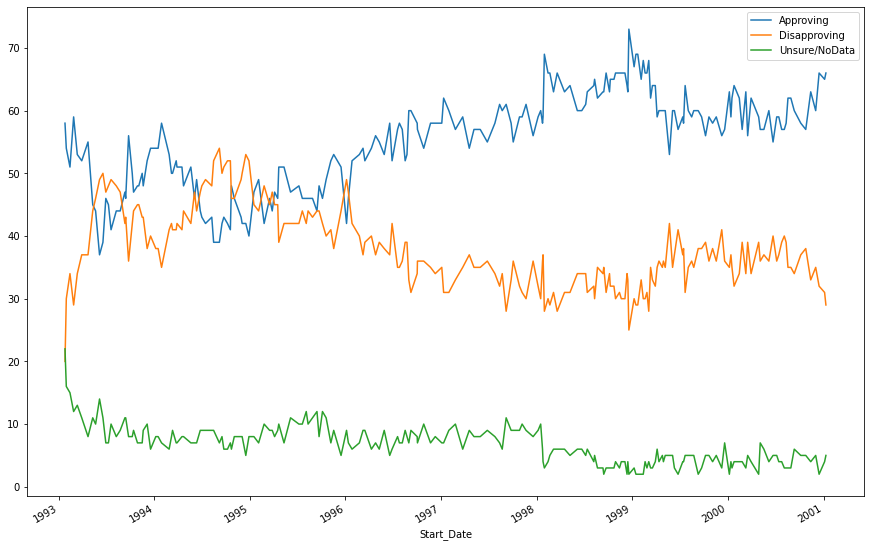

In [34]:
clinton_ratings.plot(x="Start_Date", y=["Approving", "Disapproving", "Unsure/NoData"], figsize=(15, 10))
plt.show()

In [35]:
clinton_ratings['month_year'] = pd.to_datetime(clinton_ratings['End_Date']).dt.to_period('M')
clinton_ratings.head()

Start_Date   End_Date  Approving  Disapproving  Unsure/NoData  high  low  \
0 2001-01-10 2001-01-14         66            29              5     1    0   
1 2001-01-05 2001-01-07         65            31              4     1    0   
2 2000-12-15 2000-12-17         66            32              2     1    0   
3 2000-12-02 2000-12-04         60            35              5     1    0   
4 2000-11-13 2000-11-15         63            33              4     1    0   

  month_year  
0    2001-01  
1    2001-01  
2    2000-12  
3    2000-12  
4    2000-11

In [36]:
clinton_new_ratings = clinton_ratings.groupby('month_year').mean()
clinton_new_ratings.head()

Approving  Disapproving  Unsure/NoData  high  low
month_year                                                   
1993-01          56.0          25.0           19.0   1.0  0.0
1993-02          55.0          31.5           13.5   1.0  0.0
1993-03          52.5          35.5           12.0   1.0  0.0
1993-04          55.0          37.0            8.0   1.0  0.0
1993-05          44.5          45.0           10.5   0.0  1.0

In [37]:
clinton_new_ratings.reset_index(inplace=True)
clinton_new_ratings

month_year  Approving  Disapproving  Unsure/NoData  high  low
0     1993-01       56.0          25.0           19.0   1.0  0.0
1     1993-02       55.0          31.5           13.5   1.0  0.0
2     1993-03       52.5          35.5           12.0   1.0  0.0
3     1993-04       55.0          37.0            8.0   1.0  0.0
4     1993-05       44.5          45.0           10.5   0.0  1.0
..        ...        ...           ...            ...   ...  ...
92    2000-09       61.0          34.5            4.5   1.0  0.0
93    2000-10       57.5          37.5            5.0   1.0  0.0
94    2000-11       63.0          33.0            4.0   1.0  0.0
95    2000-12       63.0          33.5            3.5   1.0  0.0
96    2001-01       65.5          30.0            4.5   1.0  0.0

[97 rows x 6 columns]

In [38]:
clinton_speeches['month_year'] = pd.to_datetime(clinton_speeches['Date']).dt.to_period('M')
clinton_speeches.head()

<ipython-input-38-ebfe6218139a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinton_speeches['month_year'] = pd.to_datetime(clinton_speeches['Date']).dt.to_period('M')


Date     President       Party  \
0 1993-01-20  Bill Clinton  Democratic   
1 1993-01-29  Bill Clinton  Democratic   
2 1993-02-05  Bill Clinton  Democratic   
3 1993-02-17  Bill Clinton  Democratic   
4 1993-04-30  Bill Clinton  Democratic   

                                        Speech Title  \
0                                    First Inaugural   
1         Press Conference on "Gays in the Military"   
2  Remarks at the Signing of the Family Medical L...   
3         Address Before a Joint Session of Congress   
4                           National Service Address   

                                          Transcript month_year  
0  My fellow citizens, today we celebrate the mys...    1993-01  
1  The President. Good afternoon, ladies and gent...    1993-01  
2  Thank you very much, thank you. Mrs. Yandle, I...    1993-02  
3  Mr. President, Mr. Speaker, Members of the Hou...    1993-02  
4  It is wonderful to be back in New Orleans and ...    1993-04

In [39]:
merged_clinton_df = clinton_new_ratings.merge(clinton_speeches, how='inner', on='month_year')
merged_clinton_df.head()

month_year  Approving  Disapproving  Unsure/NoData  high  low       Date  \
0    1993-01       56.0          25.0           19.0   1.0  0.0 1993-01-20   
1    1993-01       56.0          25.0           19.0   1.0  0.0 1993-01-29   
2    1993-02       55.0          31.5           13.5   1.0  0.0 1993-02-05   
3    1993-02       55.0          31.5           13.5   1.0  0.0 1993-02-17   
4    1993-04       55.0          37.0            8.0   1.0  0.0 1993-04-30   

      President       Party  \
0  Bill Clinton  Democratic   
1  Bill Clinton  Democratic   
2  Bill Clinton  Democratic   
3  Bill Clinton  Democratic   
4  Bill Clinton  Democratic   

                                        Speech Title  \
0                                    First Inaugural   
1         Press Conference on "Gays in the Military"   
2  Remarks at the Signing of the Family Medical L...   
3         Address Before a Joint Session of Congress   
4                           National Service Address   

                                          Transcript  
0  My fellow citizens, today we celebrate the mys...  
1  The President. Good afternoon, ladies and gent...  
2  Thank you very much, thank you. Mrs. Yandle, I...  
3  Mr. President, Mr. Speaker, Members of the Hou...  
4  It is wonderful to be back in New Orleans and ...

In [40]:
merged_clinton_df.shape

(39, 11)

In [41]:
merged_clinton_df

month_year  Approving  Disapproving  Unsure/NoData      high       low  \
0     1993-01  56.000000     25.000000      19.000000  1.000000  0.000000   
1     1993-01  56.000000     25.000000      19.000000  1.000000  0.000000   
2     1993-02  55.000000     31.500000      13.500000  1.000000  0.000000   
3     1993-02  55.000000     31.500000      13.500000  1.000000  0.000000   
4     1993-04  55.000000     37.000000       8.000000  1.000000  0.000000   
5     1993-05  44.500000     45.000000      10.500000  0.000000  1.000000   
6     1993-06  40.666667     48.666667      10.666667  0.000000  1.000000   
7     1993-09  49.666667     40.333333      10.000000  0.333333  0.666667   
8     1993-09  49.666667     40.333333      10.000000  0.333333  0.666667   
9     1993-10  48.333333     43.666667       8.000000  0.333333  0.666667   
10    1993-11  48.666667     43.666667       7.666667  0.333333  0.666667   
11    1993-12  53.000000     39.000000       8.000000  1.000000  0.000000   
12    1994-01  55.333333     37.000000       7.666667  1.000000  0.000000   
13    1994-06  46.333333     46.000000       7.666667  0.000000  1.000000   
14    1994-07  42.500000     48.500000       9.000000  0.000000  1.000000   
15    1995-01  47.000000     45.000000       8.000000  0.000000  1.000000   
16    1995-04  48.000000     43.000000       9.000000  0.333333  0.666667   
17    1995-07  47.000000     43.000000      10.000000  0.000000  1.000000   
18    1995-10  47.500000     41.000000      11.500000  0.000000  1.000000   
19    1995-11  52.500000     39.500000       8.000000  1.000000  0.000000   
20    1995-11  52.500000     39.500000       8.000000  1.000000  0.000000   
21    1996-01  46.666667     46.000000       7.333333  0.333333  0.666667   
22    1996-06  55.000000     39.500000       5.500000  1.000000  0.000000   
23    1996-08  54.000000     38.000000       8.000000  1.000000  0.000000   
24    1996-10  56.333333     35.333333       8.333333  1.000000  0.000000   
25    1996-11  58.000000     35.000000       7.000000  1.000000  0.000000   
26    1997-01  60.000000     33.000000       7.000000  1.000000  0.000000   
27    1997-02  58.500000     32.000000       9.500000  1.000000  0.000000   
28    1997-04  54.000000     37.000000       9.000000  1.000000  0.000000   
29    1998-01  59.000000     33.750000       7.250000  1.000000  0.000000   
30    1998-01  59.000000     33.750000       7.250000  1.000000  0.000000   
31    1998-03  64.500000     29.500000       6.000000  1.000000  0.000000   
32    1998-03  64.500000     29.500000       6.000000  1.000000  0.000000   
33    1998-08  63.666667     32.333333       4.000000  1.000000  0.000000   
34    1999-01  68.333333     29.333333       2.333333  1.000000  0.000000   
35    1999-03  64.500000     32.000000       3.500000  1.000000  0.000000   
36    1999-06  59.000000     37.666667       3.333333  1.000000  0.000000   
37    2000-01  62.000000     34.750000       3.250000  1.000000  0.000000   
38    2001-01  65.500000     30.000000       4.500000  1.000000  0.000000   

         Date     President       Party  \
0  1993-01-20  Bill Clinton  Democratic   
1  1993-01-29  Bill Clinton  Democratic   
2  1993-02-05  Bill Clinton  Democratic   
3  1993-02-17  Bill Clinton  Democratic   
4  1993-04-30  Bill Clinton  Democratic   
5  1993-05-05  Bill Clinton  Democratic   
6  1993-06-06  Bill Clinton  Democratic   
7  1993-09-13  Bill Clinton  Democratic   
8  1993-09-22  Bill Clinton  Democratic   
9  1993-10-07  Bill Clinton  Democratic   
10 1993-11-13  Bill Clinton  Democratic   
11 1993-12-08  Bill Clinton  Democratic   
12 1994-01-25  Bill Clinton  Democratic   
13 1994-06-06  Bill Clinton  Democratic   
14 1994-07-12  Bill Clinton  Democratic   
15 1995-01-24  Bill Clinton  Democratic   
16 1995-04-23  Bill Clinton  Democratic   
17 1995-07-19  Bill Clinton  Democratic   
18 1995-10-16  Bill Clinton  Democratic   
19 1995-11-27  Bill Clinton  Democratic   
20 1995-11-30  Bill

In [42]:
merged_clinton_df['high'] = merged_clinton_df['high'].astype(int)

In [43]:
merged_clinton_df

month_year  Approving  Disapproving  Unsure/NoData  high       low  \
0     1993-01  56.000000     25.000000      19.000000     1  0.000000   
1     1993-01  56.000000     25.000000      19.000000     1  0.000000   
2     1993-02  55.000000     31.500000      13.500000     1  0.000000   
3     1993-02  55.000000     31.500000      13.500000     1  0.000000   
4     1993-04  55.000000     37.000000       8.000000     1  0.000000   
5     1993-05  44.500000     45.000000      10.500000     0  1.000000   
6     1993-06  40.666667     48.666667      10.666667     0  1.000000   
7     1993-09  49.666667     40.333333      10.000000     0  0.666667   
8     1993-09  49.666667     40.333333      10.000000     0  0.666667   
9     1993-10  48.333333     43.666667       8.000000     0  0.666667   
10    1993-11  48.666667     43.666667       7.666667     0  0.666667   
11    1993-12  53.000000     39.000000       8.000000     1  0.000000   
12    1994-01  55.333333     37.000000       7.666667     1  0.000000   
13    1994-06  46.333333     46.000000       7.666667     0  1.000000   
14    1994-07  42.500000     48.500000       9.000000     0  1.000000   
15    1995-01  47.000000     45.000000       8.000000     0  1.000000   
16    1995-04  48.000000     43.000000       9.000000     0  0.666667   
17    1995-07  47.000000     43.000000      10.000000     0  1.000000   
18    1995-10  47.500000     41.000000      11.500000     0  1.000000   
19    1995-11  52.500000     39.500000       8.000000     1  0.000000   
20    1995-11  52.500000     39.500000       8.000000     1  0.000000   
21    1996-01  46.666667     46.000000       7.333333     0  0.666667   
22    1996-06  55.000000     39.500000       5.500000     1  0.000000   
23    1996-08  54.000000     38.000000       8.000000     1  0.000000   
24    1996-10  56.333333     35.333333       8.333333     1  0.000000   
25    1996-11  58.000000     35.000000       7.000000     1  0.000000   
26    1997-01  60.000000     33.000000       7.000000     1  0.000000   
27    1997-02  58.500000     32.000000       9.500000     1  0.000000   
28    1997-04  54.000000     37.000000       9.000000     1  0.000000   
29    1998-01  59.000000     33.750000       7.250000     1  0.000000   
30    1998-01  59.000000     33.750000       7.250000     1  0.000000   
31    1998-03  64.500000     29.500000       6.000000     1  0.000000   
32    1998-03  64.500000     29.500000       6.000000     1  0.000000   
33    1998-08  63.666667     32.333333       4.000000     1  0.000000   
34    1999-01  68.333333     29.333333       2.333333     1  0.000000   
35    1999-03  64.500000     32.000000       3.500000     1  0.000000   
36    1999-06  59.000000     37.666667       3.333333     1  0.000000   
37    2000-01  62.000000     34.750000       3.250000     1  0.000000   
38    2001-01  65.500000     30.000000       4.500000     1  0.000000   

         Date     President       Party  \
0  1993-01-20  Bill Clinton  Democratic   
1  1993-01-29  Bill Clinton  Democratic   
2  1993-02-05  Bill Clinton  Democratic   
3  1993-02-17  Bill Clinton  Democratic   
4  1993-04-30  Bill Clinton  Democratic   
5  1993-05-05  Bill Clinton  Democratic   
6  1993-06-06  Bill Clinton  Democratic   
7  1993-09-13  Bill Clinton  Democratic   
8  1993-09-22  Bill Clinton  Democratic   
9  1993-10-07  Bill Clinton  Democratic   
10 1993-11-13  Bill Clinton  Democratic   
11 1993-12-08  Bill Clinton  Democratic   
12 1994-01-25  Bill Clinton  Democratic   
13 1994-06-06  Bill Clinton  Democratic   
14 1994-07-12  Bill Clinton  Democratic   
15 1995-01-24  Bill Clinton  Democratic   
16 1995-04-23  Bill Clinton  Democratic   
17 1995-07-19  Bill Clinton  Democratic   
18 1995-10-16  Bill Clinton  Democratic   
19 1995-11-27  Bill Clinton  Democratic   
20 1995-11-30  Bill Clinton  Democratic   
21 1996-01-23  Bill Clinton  Democratic   
22 1996-06-25  Bill Clinton  Democratic   
23 1996-08-29  Bill Clinton  Democratic   
24 1996

In [44]:
df_freq_high = merged_clinton_df[merged_clinton_df['high']==1]
df_freq_low = merged_clinton_df[merged_clinton_df['high']==0]

In [45]:
data_high = df_freq_high['Transcript']
data_low = df_freq_low['Transcript']

In [46]:
pros_high = [d.split() for d in data_high.to_list()]
pros_low = [d.split() for d in data_low.to_list()]

In [47]:
total_vocab_high = set()
for comment in pros_high:
    total_vocab_high.update([c.lower() for c in comment])
len(total_vocab_high)

9841

In [48]:
total_vocab_low = set()
for comment in pros_low:
    total_vocab_low.update([c.lower() for c in comment])
len(total_vocab_low)

6684

In [49]:
flat_high = [item.lower() for sublist in pros_high for item in sublist if item not in sw_set ]
flat_low = [item.lower() for sublist in pros_low for item in sublist if item not in sw_set]

In [50]:
high_freq = FreqDist(flat_high)
low_freq = FreqDist(flat_low)

In [51]:
high_freq.most_common(25)

[('i', 1099),
 ('we', 531),
 ('people', 446),
 ('and', 413),
 ('must', 397),
 ('new', 338),
 ('every', 266),
 ('us', 264),
 ('american', 217),
 ('but', 211),
 ('make', 210),
 ('america', 205),
 ('work', 197),
 ('the', 196),
 ('one', 182),
 ('want', 176),
 ('help', 166),
 ('know', 163),
 ('world', 151),
 ('thank', 151),
 ('let', 144),
 ('last', 141),
 ('children', 140),
 ('years', 137),
 ('say', 135)]

In [52]:
low_freq.most_common(25)

[('i', 503),
 ('people', 289),
 ('we', 232),
 ('and', 223),
 ('us', 168),
 ('but', 147),
 ('must', 138),
 ('american', 134),
 ('the', 124),
 ('every', 117),
 ('work', 114),
 ('one', 111),
 ('new', 110),
 ('health', 106),
 ('make', 101),
 ('would', 93),
 ('care', 90),
 ('americans', 86),
 ('let', 82),
 ('it', 82),
 ('want', 80),
 ('children', 77),
 ('also', 74),
 ('still', 72),
 ('way', 71)]

In [53]:
high_total_word_count = sum(high_freq.values())
high_top_25 = high_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in high_top_25:
    normalized_frequency = word[1]/high_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

i 		 0.02145
we 		 0.01036
people 		 0.008704
and 		 0.00806
must 		 0.007748
new 		 0.006597
every 		 0.005191
us 		 0.005152
american 		 0.004235
but 		 0.004118
make 		 0.004098
america 		 0.004001
work 		 0.003845
the 		 0.003825
one 		 0.003552
want 		 0.003435
help 		 0.00324
know 		 0.003181
world 		 0.002947
thank 		 0.002947
let 		 0.00281
last 		 0.002752
children 		 0.002732
years 		 0.002674
say 		 0.002635


In [54]:
low_total_word_count = sum(low_freq.values())
low_top_25 = low_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in low_top_25:
    normalized_frequency = word[1]/low_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

i 		 0.01957
people 		 0.01124
we 		 0.009025
and 		 0.008675
us 		 0.006536
but 		 0.005719
must 		 0.005369
american 		 0.005213
the 		 0.004824
every 		 0.004552
work 		 0.004435
one 		 0.004318
new 		 0.004279
health 		 0.004124
make 		 0.003929
would 		 0.003618
care 		 0.003501
americans 		 0.003346
let 		 0.00319
it 		 0.00319
want 		 0.003112
children 		 0.002996
also 		 0.002879
still 		 0.002801
way 		 0.002762


In [55]:
high_bar_counts = [x[1] for x in high_freq.most_common(25)]
high_bar_words = [x[0] for x in high_freq.most_common(25)]

low_bar_counts = [x[1] for x in low_freq.most_common(25)]
low_bar_words = [x[0] for x in low_freq.most_common(25)]

In [56]:
color = cm.viridis_r(np.linspace(.4,.8, 30))

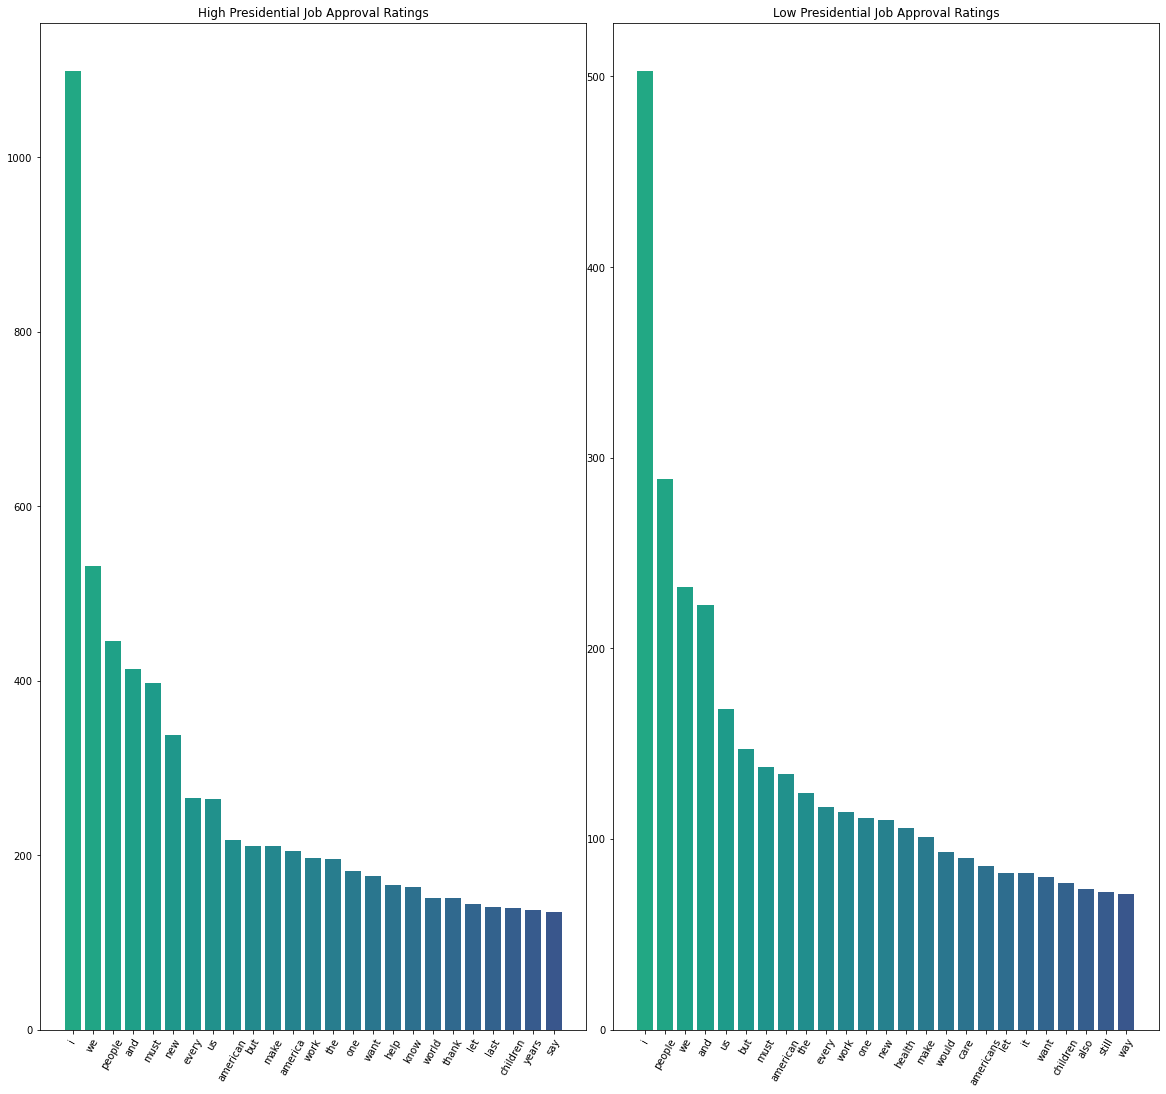

In [57]:
new_figure = plt.figure(figsize=(16,15))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(high_bar_words, high_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(low_bar_words, low_bar_counts, color=color )

ax.title.set_text('High Presidential Job Approval Ratings')
ax2.title.set_text('Low Presidential Job Approval Ratings')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

In [58]:
from wordcloud import WordCloud
high_dictionary = dict(zip(high_bar_words, high_bar_counts))
low_dictionary = dict(zip(low_bar_words, low_bar_counts))

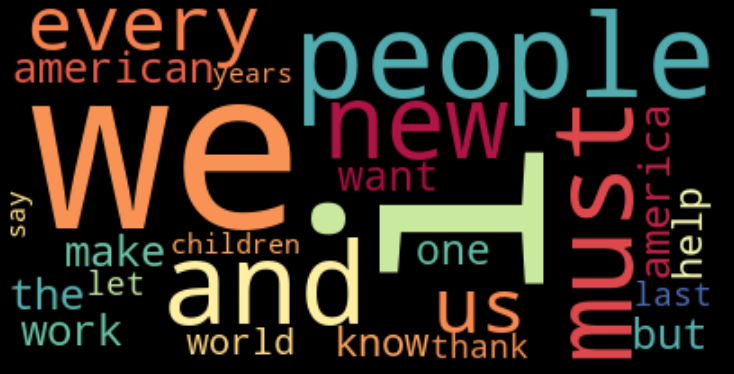

In [59]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(high_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

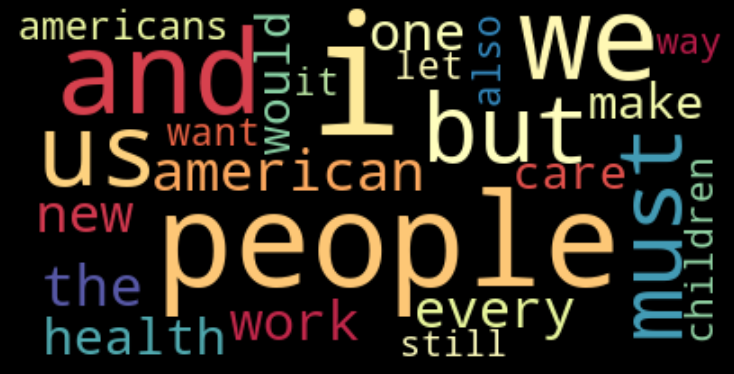

In [60]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(low_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

# President Bush

In [61]:
bush_speeches=new_df[(new_df['President'] == 'George W. Bush')]
bush_speeches.head()

Date       President       Party  \
39 2001-01-20  George W. Bush  Republican   
40 2001-01-29  George W. Bush  Republican   
41 2001-05-11  George W. Bush  Republican   
42 2001-06-07  George W. Bush  Republican   
43 2001-08-09  George W. Bush  Republican   

                                         Speech Title  \
39                            First Inaugural Address   
40   Remarks on Faith-Based and Community Initiatives   
41  Proposal for Global Fund to Fight HIV/AIDS, Ma...   
42  Remarks on Signing the Economic Growth and Tax...   
43        Address to the Nation on Stem Cell Research   

                                           Transcript  
39  President Clinton, distinguished guests and my...  
40  Good morning. Thank you all for coming. I take...  
41  It is my honor to welcome our friend, the Pres...  
42  Thank you. Sit down. Behave yourself. You're a...  
43  Good evening. I appreciate you giving me a few...

In [62]:
bush_speeches

Date       President       Party  \
39 2001-01-20  George W. Bush  Republican   
40 2001-01-29  George W. Bush  Republican   
41 2001-05-11  George W. Bush  Republican   
42 2001-06-07  George W. Bush  Republican   
43 2001-08-09  George W. Bush  Republican   
44 2001-09-11  George W. Bush  Republican   
45 2001-09-21  George W. Bush  Republican   
46 2002-01-08  George W. Bush  Republican   
47 2002-01-29  George W. Bush  Republican   
48 2002-06-01  George W. Bush  Republican   
49 2002-06-06  George W. Bush  Republican   
50 2002-06-19  George W. Bush  Republican   
51 2002-09-12  George W. Bush  Republican   
52 2003-01-28  George W. Bush  Republican   
53 2003-03-17  George W. Bush  Republican   
54 2003-03-19  George W. Bush  Republican   
55 2003-11-06  George W. Bush  Republican   
56 2003-12-08  George W. Bush  Republican   
57 2004-01-07  George W. Bush  Republican   
58 2004-01-20  George W. Bush  Republican   
59 2004-07-17  George W. Bush  Republican   
60 2004-09-03  George W. Bush  Republican   
61 2005-01-20  George W. Bush  Republican   
62 2005-02-02  George W. Bush  Republican   
63 2005-08-31  George W. Bush  Republican   
64 2005-09-15  George W. Bush  Republican   
65 2005-12-18  George W. Bush  Republican   
66 2006-01-31  George W. Bush  Republican   
67 2006-07-19  George W. Bush  Republican   
68 2007-01-10  George W. Bush  Republican   
69 2007-01-23  George W. Bush  Republican   
70 2007-04-09  George W. Bush  Republican   
71 2008-01-28  George W. Bush  Republican   
72 2008-03-19  George W. Bush  Republican   
74 2008-10-03  George W. Bush  Republican   
76 2008-11-13  George W. Bush  Republican   
77 2008-12-19  George W. Bush  Republican   
78 2009-01-12  George W. Bush  Republican   
79 2009-01-15  George W. Bush  Republican   

                                         Speech Title  \
39                            First Inaugural Address   
40   Remarks on Faith-Based and Community Initiatives   
41  Proposal for Global Fund to Fight HIV/AIDS, Ma...   
42  Remarks on Signing the Economic Growth and Tax...   
43        Address to the Nation on Stem Cell Research   
44     Address to the Nation on the Terrorist Attacks   
45  Address on the U.S. Response to the Attacks of...   
46               Remarks on No Child Left Behind Bill   
47                         State of the Union Address   
48                    Graduation Speech at West Point   
49  Address to the Nation on the Department of Hom...   
50  Speech on New Mother and Child HIV Prevention ...   
51                 Remarks at the UN General Assembly   
52                         State of the Union Address   
53                      Address to the Nation on Iraq   
54               Address on the Start of the Iraq War   
55         Remarks on Freedom in Iraq and Middle East   
56            Address on Signing Medicare Legislation   
57                  Temporary Worker Program Proposal   
58                         State of the Union Address   
59    Remarks on National Security and the War Effort   
60      Remarks at the Republican National Convention   
61                           Second Inaugural Address   
62                         State of the Union Address   
63        Remarks on Hurricane Katrina Relief Efforts   
64          Hurricane Relief Address from New Orleans   
65                         Address on Renewal in Iraq   
66                         State of the Union Address   
67               Remarks on Stem Cell Research Policy   
68             Address on Military Operations in Iraq   
69                         State of the Union Address   
70         Speech on Comprehensive Immigration Reform   
71                         State of the Union Address   
72                       Remarks on the War on Terror   
74  Remarks on Emergency Economic Stabilization Ac...   
76  Speech on Financial Markets and the World Economy   
77               Remarks on Plan to Assist Automakers   
78                             Final Press

In [63]:
bush_speeches.shape

(39, 5)

In [64]:
bush_ratings = pd.read_csv('American Presidency Project - Approval Ratings for POTUS - George W. Bush.csv')
bush_ratings

Start Date    End Date  Approving  Disapproving  Unsure/NoData
0    01/09/2009  01/11/2009         34            61              5
1    12/12/2008  12/14/2008         29            67              4
2    12/04/2008  12/07/2008         32            61              7
3    11/13/2008  11/16/2008         29            66              5
4    11/07/2008  11/09/2008         28            68              4
..          ...         ...        ...           ...            ...
277    3/9/2001   3/11/2001         58            29             13
278    3/5/2001    3/7/2001         63            22             15
279   2/19/2001   2/21/2001         62            21             17
280    2/9/2001   2/11/2001         57            25             18
281    2/1/2001    2/4/2001         57            25             18

[282 rows x 5 columns]

In [65]:
bush_ratings.nunique()

Start Date       282
End Date         282
Approving         62
Disapproving      64
Unsure/NoData     17
dtype: int64

In [66]:
bush_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Start Date     282 non-null    object
 1   End Date       282 non-null    object
 2   Approving      282 non-null    int64 
 3   Disapproving   282 non-null    int64 
 4   Unsure/NoData  282 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 11.1+ KB


In [67]:
bush_ratings.describe()

Approving  Disapproving  Unsure/NoData
count  282.000000    282.000000     282.000000
mean    51.347518     43.843972       4.808511
std     15.873381     16.412513       2.628654
min     25.000000      6.000000       1.000000
25%     37.000000     32.000000       3.000000
50%     50.500000     46.000000       4.000000
75%     62.000000     59.000000       5.000000
max     90.000000     71.000000      18.000000

In [68]:
bush_ratings['high'], bush_ratings['low'] = (bush_ratings.Approving >= 50).astype(int), (~(bush_ratings.Approving >=50)).astype(int)
bush_ratings

Start Date    End Date  Approving  Disapproving  Unsure/NoData  high  low
0    01/09/2009  01/11/2009         34            61              5     0    1
1    12/12/2008  12/14/2008         29            67              4     0    1
2    12/04/2008  12/07/2008         32            61              7     0    1
3    11/13/2008  11/16/2008         29            66              5     0    1
4    11/07/2008  11/09/2008         28            68              4     0    1
..          ...         ...        ...           ...            ...   ...  ...
277    3/9/2001   3/11/2001         58            29             13     1    0
278    3/5/2001    3/7/2001         63            22             15     1    0
279   2/19/2001   2/21/2001         62            21             17     1    0
280    2/9/2001   2/11/2001         57            25             18     1    0
281    2/1/2001    2/4/2001         57            25             18     1    0

[282 rows x 7 columns]

In [69]:
bush_ratings['Start Date'] = pd.to_datetime(bush_ratings['Start Date'])
bush_ratings['End Date'] = pd.to_datetime(bush_ratings['End Date'])
bush_ratings.head()

Start Date   End Date  Approving  Disapproving  Unsure/NoData  high  low
0 2009-01-09 2009-01-11         34            61              5     0    1
1 2008-12-12 2008-12-14         29            67              4     0    1
2 2008-12-04 2008-12-07         32            61              7     0    1
3 2008-11-13 2008-11-16         29            66              5     0    1
4 2008-11-07 2008-11-09         28            68              4     0    1

In [70]:
bush_ratings.rename(columns={'Start Date': 'Start_Date', 'End Date': 'End_Date'}, inplace=True)
bush_ratings.head()

Start_Date   End_Date  Approving  Disapproving  Unsure/NoData  high  low
0 2009-01-09 2009-01-11         34            61              5     0    1
1 2008-12-12 2008-12-14         29            67              4     0    1
2 2008-12-04 2008-12-07         32            61              7     0    1
3 2008-11-13 2008-11-16         29            66              5     0    1
4 2008-11-07 2008-11-09         28            68              4     0    1

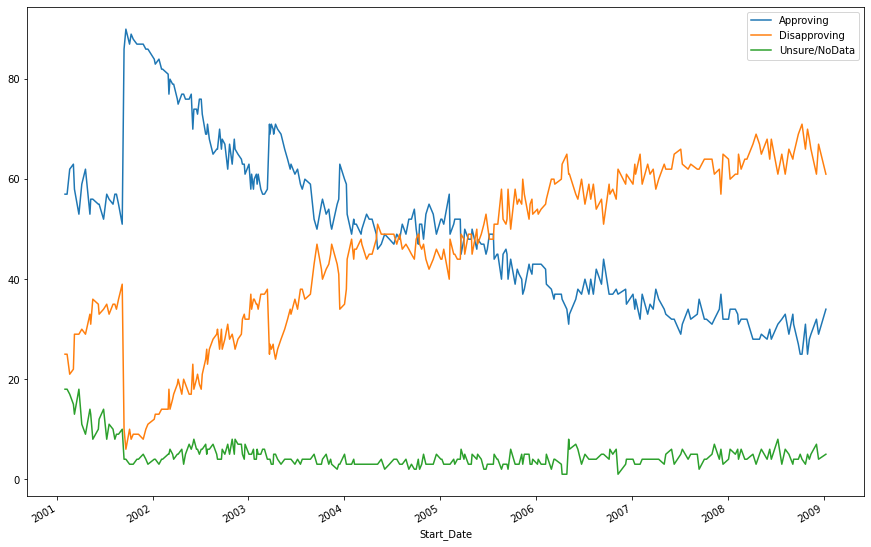

In [71]:
bush_ratings.plot(x="Start_Date", y=["Approving", "Disapproving", "Unsure/NoData"], figsize=(15, 10))
plt.show()

In [72]:
bush_ratings['month_year'] = pd.to_datetime(bush_ratings['End_Date']).dt.to_period('M')
bush_ratings.head()

Start_Date   End_Date  Approving  Disapproving  Unsure/NoData  high  low  \
0 2009-01-09 2009-01-11         34            61              5     0    1   
1 2008-12-12 2008-12-14         29            67              4     0    1   
2 2008-12-04 2008-12-07         32            61              7     0    1   
3 2008-11-13 2008-11-16         29            66              5     0    1   
4 2008-11-07 2008-11-09         28            68              4     0    1   

  month_year  
0    2009-01  
1    2008-12  
2    2008-12  
3    2008-11  
4    2008-11

In [73]:
bush_new_ratings = bush_ratings.groupby('month_year').mean()
bush_new_ratings.head()

Approving  Disapproving  Unsure/NoData  high  low
month_year                                                   
2001-02     58.666667     23.666667      17.666667   1.0  0.0
2001-03     58.000000     26.666667      15.333333   1.0  0.0
2001-04     60.500000     29.500000      10.000000   1.0  0.0
2001-05     55.000000     33.333333      11.666667   1.0  0.0
2001-06     55.000000     34.000000      11.000000   1.0  0.0

In [74]:
bush_new_ratings.reset_index(inplace=True)
bush_new_ratings

month_year  Approving  Disapproving  Unsure/NoData  high  low
0     2001-02  58.666667     23.666667      17.666667   1.0  0.0
1     2001-03  58.000000     26.666667      15.333333   1.0  0.0
2     2001-04  60.500000     29.500000      10.000000   1.0  0.0
3     2001-05  55.000000     33.333333      11.666667   1.0  0.0
4     2001-06  55.000000     34.000000      11.000000   1.0  0.0
..        ...        ...           ...            ...   ...  ...
91    2008-09  30.333333     66.000000       3.666667   0.0  1.0
92    2008-10  27.000000     69.000000       4.000000   0.0  1.0
93    2008-11  27.333333     68.000000       4.666667   0.0  1.0
94    2008-12  30.500000     64.000000       5.500000   0.0  1.0
95    2009-01  34.000000     61.000000       5.000000   0.0  1.0

[96 rows x 6 columns]

In [75]:
bush_speeches['month_year'] = pd.to_datetime(bush_speeches['Date']).dt.to_period('M')
bush_speeches.head()

<ipython-input-75-29483cddf034>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bush_speeches['month_year'] = pd.to_datetime(bush_speeches['Date']).dt.to_period('M')


Date       President       Party  \
39 2001-01-20  George W. Bush  Republican   
40 2001-01-29  George W. Bush  Republican   
41 2001-05-11  George W. Bush  Republican   
42 2001-06-07  George W. Bush  Republican   
43 2001-08-09  George W. Bush  Republican   

                                         Speech Title  \
39                            First Inaugural Address   
40   Remarks on Faith-Based and Community Initiatives   
41  Proposal for Global Fund to Fight HIV/AIDS, Ma...   
42  Remarks on Signing the Economic Growth and Tax...   
43        Address to the Nation on Stem Cell Research   

                                           Transcript month_year  
39  President Clinton, distinguished guests and my...    2001-01  
40  Good morning. Thank you all for coming. I take...    2001-01  
41  It is my honor to welcome our friend, the Pres...    2001-05  
42  Thank you. Sit down. Behave yourself. You're a...    2001-06  
43  Good evening. I appreciate you giving me a few...    2001-08

In [76]:
merged_bush_df = bush_new_ratings.merge(bush_speeches, how='inner', on='month_year')
merged_bush_df.head()

month_year  Approving  Disapproving  Unsure/NoData  high  low       Date  \
0    2001-05  55.000000     33.333333      11.666667   1.0  0.0 2001-05-11   
1    2001-06  55.000000     34.000000      11.000000   1.0  0.0 2001-06-07   
2    2001-08  56.000000     35.000000       9.000000   1.0  0.0 2001-08-09   
3    2001-09  75.666667     18.333333       6.000000   1.0  0.0 2001-09-11   
4    2001-09  75.666667     18.333333       6.000000   1.0  0.0 2001-09-21   

        President       Party  \
0  George W. Bush  Republican   
1  George W. Bush  Republican   
2  George W. Bush  Republican   
3  George W. Bush  Republican   
4  George W. Bush  Republican   

                                        Speech Title  \
0  Proposal for Global Fund to Fight HIV/AIDS, Ma...   
1  Remarks on Signing the Economic Growth and Tax...   
2        Address to the Nation on Stem Cell Research   
3     Address to the Nation on the Terrorist Attacks   
4  Address on the U.S. Response to the Attacks of...   

                                          Transcript  
0  It is my honor to welcome our friend, the Pres...  
1  Thank you. Sit down. Behave yourself. You're a...  
2  Good evening. I appreciate you giving me a few...  
3  Good evening. Today, our fellow citizens, our ...  
4  Mr. Speaker, Mr. President Pro Tempore, member...

In [77]:
merged_bush_df.shape

(37, 11)

In [78]:
merged_bush_df

month_year  Approving  Disapproving  Unsure/NoData  high   low       Date  \
0     2001-05  55.000000     33.333333      11.666667  1.00  0.00 2001-05-11   
1     2001-06  55.000000     34.000000      11.000000  1.00  0.00 2001-06-07   
2     2001-08  56.000000     35.000000       9.000000  1.00  0.00 2001-08-09   
3     2001-09  75.666667     18.333333       6.000000  1.00  0.00 2001-09-11   
4     2001-09  75.666667     18.333333       6.000000  1.00  0.00 2001-09-21   
5     2002-01  83.666667     12.666667       3.666667  1.00  0.00 2002-01-08   
6     2002-01  83.666667     12.666667       3.666667  1.00  0.00 2002-01-29   
7     2002-06  73.400000     20.200000       6.400000  1.00  0.00 2002-06-01   
8     2002-06  73.400000     20.200000       6.400000  1.00  0.00 2002-06-06   
9     2002-06  73.400000     20.200000       6.400000  1.00  0.00 2002-06-19   
10    2002-09  67.200000     28.200000       4.600000  1.00  0.00 2002-09-12   
11    2003-01  60.000000     35.000000       5.000000  1.00  0.00 2003-01-28   
12    2003-03  65.200000     30.600000       4.200000  1.00  0.00 2003-03-17   
13    2003-03  65.200000     30.600000       4.200000  1.00  0.00 2003-03-19   
14    2003-11  51.666667     45.000000       3.333333  1.00  0.00 2003-11-06   
15    2003-12  58.000000     39.333333       2.666667  1.00  0.00 2003-12-08   
16    2004-01  57.333333     39.000000       3.666667  1.00  0.00 2004-01-07   
17    2004-01  57.333333     39.000000       3.666667  1.00  0.00 2004-01-20   
18    2004-07  48.000000     48.000000       4.000000  0.00  1.00 2004-07-17   
19    2004-09  52.666667     45.000000       2.333333  1.00  0.00 2004-09-03   
20    2005-01  51.666667     44.666667       3.666667  1.00  0.00 2005-01-20   
21    2005-02  52.250000     44.500000       3.250000  0.75  0.25 2005-02-02   
22    2005-08  43.750000     53.000000       3.250000  0.00  1.00 2005-08-31   
23    2005-09  43.750000     52.750000       3.500000  0.00  1.00 2005-09-15   
24    2005-12  42.250000     54.000000       3.750000  0.00  1.00 2005-12-18   
25    2006-01  43.000000     53.666667       3.333333  0.00  1.00 2006-01-31   
26    2006-07  39.000000     56.666667       4.333333  0.00  1.00 2006-07-19   
27    2007-01  35.666667     61.000000       3.333333  0.00  1.00 2007-01-10   
28    2007-01  35.666667     61.000000       3.333333  0.00  1.00 2007-01-23   
29    2007-04  37.000000     59.000000       4.000000  0.00  1.00 2007-04-09   
30    2008-01  33.000000     62.000000       5.000000  0.00  1.00 2008-01-28   
31    2008-03  32.000000     64.000000       4.000000  0.00  1.00 2008-03-19   
32    2008-10  27.000000     69.000000       4.000000  0.00  1.00 2008-10-03   
33    2008-11  27.333333     68.000000       4.666667  0.00  1.00 2008-11-13   
34    2008-12  30.500000     64.000000       5.500000  0.00  1.00 2008-12-19   
35    2009-01  34.000000     61.000000       5.000000  0.00  1.00 2009-01-12   
36    2009-01  34.000000     61.000000       5.000000  0.00  1.00 2009-01-15   

         President       Party  \
0   George W. Bush  Republican   
1   George W. Bush  Republican   
2   George W. Bush  Republican   
3   George W. Bush  Republican   
4   George W. Bush  Republican   
5   George W. Bush  Republican   
6   George W. Bush  Republican   
7   George W. Bush  Republican   
8   George W. Bush  Republican   
9   George W. Bush  Republican   
10  George W. Bush  Republican   
11  George W. Bush  Republican   
12  George W. Bush  Republican   
13  George W. Bush  Republican   
14  George W. Bush  Republican   
15  George W. Bush  Republican   
16  George W. Bush  Republican   
17  George W. Bush  Republican   
18  George W. Bush  Republican   
19  George W. Bush  Republican   
20  George W. Bush  Republican   
21  George W. Bush  Republican   
22  George W. Bush  Republican   
23  George W. Bush  Republican   
24  George W. Bush  Republican   
25  George W. Bush  Republican   
26  George W. Bush  Republican   
27  George

In [79]:
bush_freq_high = merged_bush_df[merged_bush_df['high']==1]
bush_freq_low = merged_bush_df[merged_bush_df['high']==0]

In [80]:
bush_high = bush_freq_high['Transcript']
bush_low = bush_freq_low['Transcript']

In [81]:
bush_pros_high = [d.split() for d in bush_high.to_list()]
bush_pros_low = [d.split() for d in bush_low.to_list()]

In [82]:
bush_total_vocab_high = set()
for comment in bush_pros_high:
    bush_total_vocab_high.update([c.lower() for c in comment])
len(bush_total_vocab_high)

7677

In [83]:
bush_total_vocab_low = set()
for comment in bush_pros_low:
    bush_total_vocab_low.update([c.lower() for c in comment])
len(bush_total_vocab_low)

7545

In [84]:
bush_flat_high = [item.lower() for sublist in bush_pros_high for item in sublist if item not in sw_list]
bush_flat_low = [item.lower() for sublist in bush_pros_low for item in sublist if item not in sw_list]

In [85]:
bush_high_freq = FreqDist(bush_flat_high)
bush_low_freq = FreqDist(bush_flat_low)

In [86]:
bush_high_freq.most_common(25)

[('i', 354),
 ('and', 239),
 ('we', 221),
 ('the', 220),
 ('america', 166),
 ('every', 146),
 ('new', 137),
 ('in', 133),
 ('people', 131),
 ('must', 129),
 ('united', 116),
 ('american', 112),
 ('great', 104),
 ('one', 103),
 ('world', 102),
 ('many', 95),
 ('this', 94),
 ('freedom', 91),
 ('security', 90),
 ('our', 89),
 ('nations', 83),
 ('americans', 81),
 ('nation', 80),
 ('work', 79),
 ('make', 75)]

In [87]:
bush_low_freq.most_common(25)

[('i', 494),
 ('and', 370),
 ('people', 212),
 ('the', 192),
 ('we', 186),
 ('new', 143),
 ('america', 140),
 ('in', 132),
 ('must', 125),
 ('would', 121),
 ('american', 116),
 ('help', 108),
 ("we're", 100),
 ('us', 99),
 ('iraq', 93),
 ('iraqi', 92),
 ('make', 91),
 ('this', 91),
 ('work', 90),
 ('one', 89),
 ('world', 87),
 ('congress', 82),
 ('many', 78),
 ('going', 77),
 ('also', 76)]

In [88]:
bush_high_total_word_count = sum(bush_high_freq.values())
bush_high_top_25 = bush_high_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in bush_high_top_25:
    normalized_frequency = word[1]/bush_high_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

i 		 0.01216
and 		 0.00821
we 		 0.007592
the 		 0.007558
america 		 0.005703
every 		 0.005015
new 		 0.004706
in 		 0.004569
people 		 0.0045
must 		 0.004431
united 		 0.003985
american 		 0.003847
great 		 0.003573
one 		 0.003538
world 		 0.003504
many 		 0.003263
this 		 0.003229
freedom 		 0.003126
security 		 0.003092
our 		 0.003057
nations 		 0.002851
americans 		 0.002783
nation 		 0.002748
work 		 0.002714
make 		 0.002576


In [89]:
bush_low_total_word_count = sum(bush_low_freq.values())
bush_low_top_25 = bush_low_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in bush_low_top_25:
    normalized_frequency = word[1]/bush_low_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

i 		 0.01668
and 		 0.01249
people 		 0.007158
the 		 0.006483
we 		 0.00628
new 		 0.004828
america 		 0.004727
in 		 0.004457
must 		 0.004221
would 		 0.004086
american 		 0.003917
help 		 0.003647
we're 		 0.003377
us 		 0.003343
iraq 		 0.00314
iraqi 		 0.003106
make 		 0.003073
this 		 0.003073
work 		 0.003039
one 		 0.003005
world 		 0.002938
congress 		 0.002769
many 		 0.002634
going 		 0.0026
also 		 0.002566


In [90]:
bush_high_bar_counts = [x[1] for x in bush_high_freq.most_common(25)]
bush_high_bar_words = [x[0] for x in bush_high_freq.most_common(25)]

bush_low_bar_counts = [x[1] for x in bush_low_freq.most_common(25)]
bush_low_bar_words = [x[0] for x in bush_low_freq.most_common(25)]

In [91]:
color = cm.viridis_r(np.linspace(.4,.8, 30))

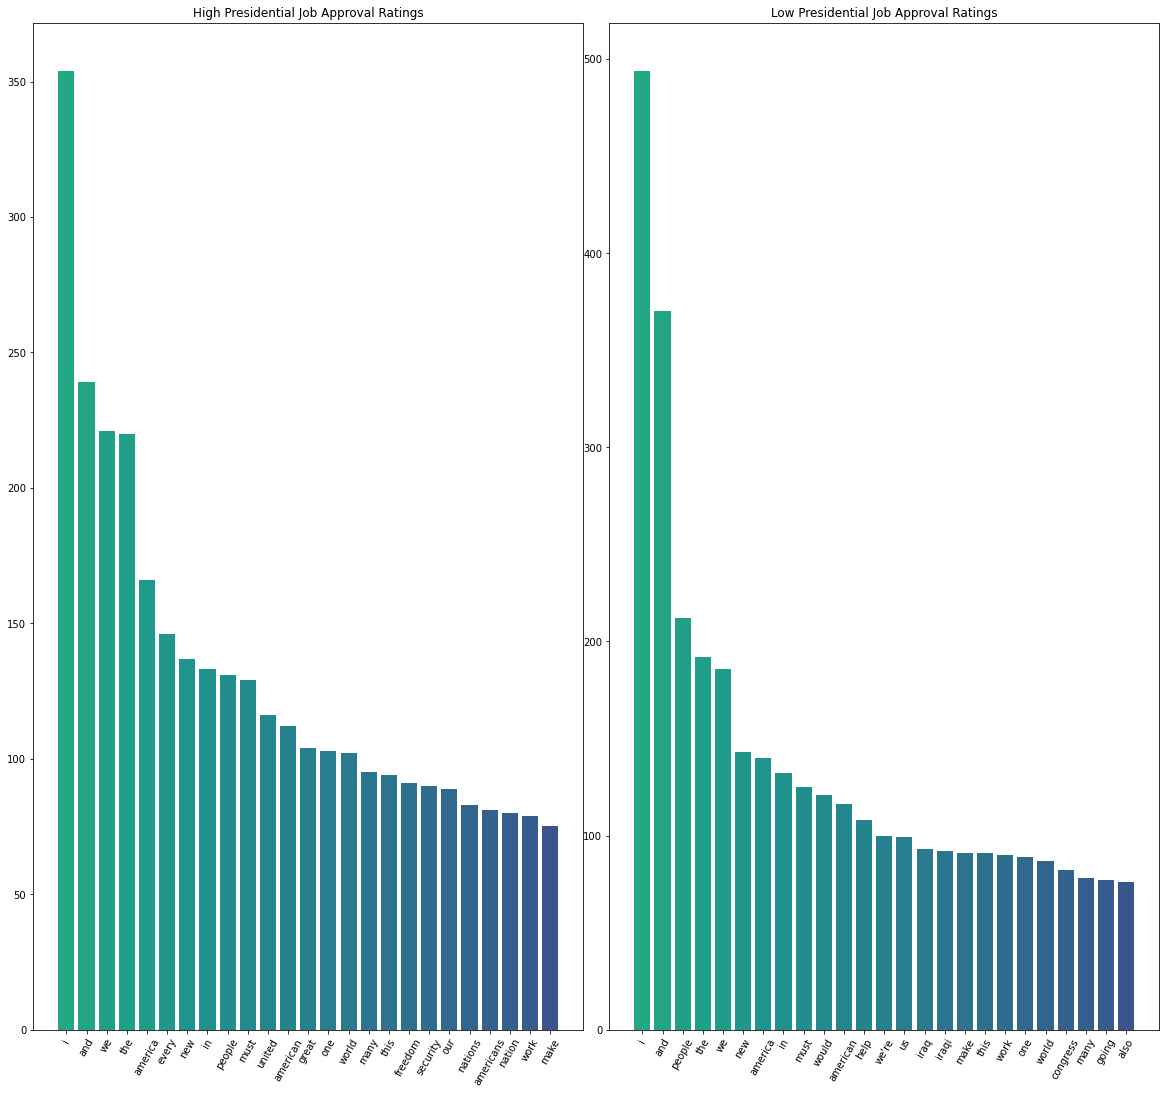

In [92]:
new_figure = plt.figure(figsize=(16,15))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(bush_high_bar_words, bush_high_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(bush_low_bar_words, bush_low_bar_counts, color=color )

ax.title.set_text('High Presidential Job Approval Ratings')
ax2.title.set_text('Low Presidential Job Approval Ratings')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

In [93]:
from wordcloud import WordCloud
bush_high_dictionary = dict(zip(bush_high_bar_words, bush_high_bar_counts))
bush_low_dictionary = dict(zip(bush_low_bar_words, bush_low_bar_counts))

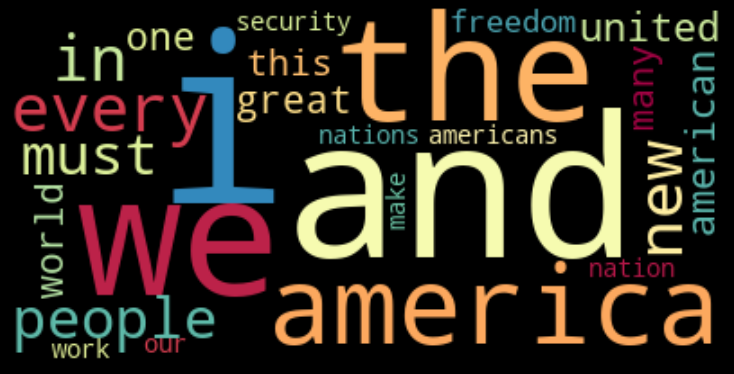

In [94]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(bush_high_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

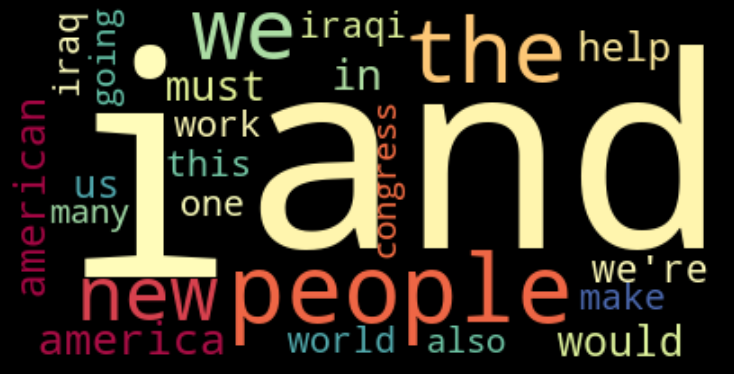

In [95]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(bush_low_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

# President Obama

In [96]:
obama_speeches=new_df[(new_df['President'] == 'Barack Obama')]
obama_speeches.head()

Date     President       Party  \
73 2008-08-28  Barack Obama  Democratic   
75 2008-11-04  Barack Obama  Democratic   
80 2009-01-20  Barack Obama  Democratic   
81 2009-01-29  Barack Obama  Democratic   
82 2009-02-07  Barack Obama  Democratic   

                                         Speech Title  \
73  Acceptance Speech at the Democratic National C...   
75                          Remarks on Election Night   
80                                  Inaugural Address   
81  Remarks on the Lilly Ledbetter Fair Pay Restor...   
82  Remarks on the American Recovery and Reinvestm...   

                                           Transcript  
73  To Chairman Dean and my great friend Dick Durb...  
75  If there is anyone out there who still doubts ...  
80  I stand here today humbled by the task before ...  
81  It is fitting that with the very first bill I ...  
82  Thank you, everybody. Please have a seat. You ...

In [97]:
obama_speeches

Date     President       Party  \
73  2008-08-28  Barack Obama  Democratic   
75  2008-11-04  Barack Obama  Democratic   
80  2009-01-20  Barack Obama  Democratic   
81  2009-01-29  Barack Obama  Democratic   
82  2009-02-07  Barack Obama  Democratic   
83  2009-02-24  Barack Obama  Democratic   
84  2009-05-26  Barack Obama  Democratic   
85  2009-06-04  Barack Obama  Democratic   
86  2009-09-09  Barack Obama  Democratic   
87  2009-12-01  Barack Obama  Democratic   
88  2009-12-10  Barack Obama  Democratic   
89  2010-01-27  Barack Obama  Democratic   
90  2010-02-09  Barack Obama  Democratic   
91  2010-03-15  Barack Obama  Democratic   
92  2010-04-15  Barack Obama  Democratic   
93  2010-04-28  Barack Obama  Democratic   
94  2010-06-15  Barack Obama  Democratic   
95  2010-08-31  Barack Obama  Democratic   
96  2010-09-23  Barack Obama  Democratic   
97  2010-11-03  Barack Obama  Democratic   
98  2011-01-12  Barack Obama  Democratic   
99  2011-01-25  Barack Obama  Democratic   
100 2011-05-01  Barack Obama  Democratic   
101 2011-05-19  Barack Obama  Democratic   
102 2011-05-25  Barack Obama  Democratic   
103 2011-06-22  Barack Obama  Democratic   
104 2011-09-08  Barack Obama  Democratic   
105 2011-10-21  Barack Obama  Democratic   
106 2012-01-24  Barack Obama  Democratic   
107 2012-09-06  Barack Obama  Democratic   
108 2012-11-06  Barack Obama  Democratic   
109 2012-12-16  Barack Obama  Democratic   
110 2013-01-21  Barack Obama  Democratic   
111 2013-01-29  Barack Obama  Democratic   
112 2013-02-13  Barack Obama  Democratic   
113 2013-03-01  Barack Obama  Democratic   
114 2013-03-21  Barack Obama  Democratic   
115 2013-04-08  Barack Obama  Democratic   
116 2013-07-19  Barack Obama  Democratic   
117 2013-07-24  Barack Obama  Democratic   
118 2013-09-10  Barack Obama  Democratic   
119 2013-12-04  Barack Obama  Democratic   
120 2014-01-28  Barack Obama  Democratic   
121 2014-11-20  Barack Obama  Democratic   
122 2015-01-20  Barack Obama  Democratic   
123 2015-03-07  Barack Obama  Democratic   
124 2015-06-26  Barack Obama  Democratic   
125 2016-01-12  Barack Obama  Democratic   
126 2016-03-22  Barack Obama  Democratic   
127 2016-05-15  Barack Obama  Democratic   

                                          Speech Title  \
73   Acceptance Speech at the Democratic National C...   
75                           Remarks on Election Night   
80                                   Inaugural Address   
81   Remarks on the Lilly Ledbetter Fair Pay Restor...   
82   Remarks on the American Recovery and Reinvestm...   
83          Address Before a Joint Session of Congress   
84   Remarks on Nominating Judge Sonia Sotomayor to...   
85                         Address at Cairo University   
86                  Address to Congress on Health Care   
87      Speech on Strategy in Afghanistan and Pakistan   
88                     Acceptance of Nobel Peace Prize   
89                     2010 State of the Union Address   
90           News Conference on Congressional Gridlock   
91                        Speech on Health Care Reform   
92    Remarks on Space Exploration in the 21st Century   
93                       Remarks on Wall Street Reform   
94                          Speech on the BP Oil Spill   
95    Address on the End of the Combat Mission in Iraq   
96                       Address to the United Nations   
97       Press Conference After 2010 Midterm Elections   
98   Remarks at Memorial for Victims of the Tucson,...   
99                     2011 State of the Union Address   
100            Remarks on the Death of Osama Bin Laden   
101  Speech on American Diplomacy in the Middle Eas...   
102                  Address to the British Parliament   
103                 Remarks on the Afghanistan Pullout   
104       Address to Congress on the American Jobs Act   
105              Remarks on the End of the War in Iraq   
106                    2012 State of the Union Address   
107  Nominee Acceptance S

In [98]:
obama_ratings = pd.read_csv('American Presidency Project - Approval Ratings for POTUS - Barack Obama.csv')
obama_ratings

Start Date    End Date  Approving  Disapproving  Unsure/NoData
0    01/19/2009  01/25/2009         67            13             20
1    01/26/2009  02/01/2009         66            18             16
2    02/02/2009  02/08/2009         65            21             14
3    02/09/2009  02/15/2009         64            22             14
4    02/16/2009  02/22/2009         62            25             13
..          ...         ...        ...           ...            ...
413  12/19/2016  12/25/2016         56            40              4
414  12/26/2016  01/01/2017         55            40              5
415  01/02/2017  01/08/2017         55            42              3
416  01/09/2017  01/15/2017         57            39              4
417  01/16/2017  01/19/2017         59            37              4

[418 rows x 5 columns]

In [99]:
obama_ratings.nunique()

Start Date       418
End Date         418
Approving         28
Disapproving      34
Unsure/NoData     14
dtype: int64

In [100]:
obama_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Start Date     418 non-null    object
 1   End Date       418 non-null    object
 2   Approving      418 non-null    int64 
 3   Disapproving   418 non-null    int64 
 4   Unsure/NoData  418 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 16.5+ KB


In [101]:
obama_ratings.describe()

Approving  Disapproving  Unsure/NoData
count  418.000000    418.000000     418.000000
mean    47.968900     45.602871       6.428230
std      5.369019      5.996817       2.059281
min     40.000000     13.000000       2.000000
25%     45.000000     44.000000       5.000000
50%     47.000000     46.000000       7.000000
75%     50.750000     49.000000       8.000000
max     67.000000     55.000000      20.000000

In [102]:
obama_ratings['high'], obama_ratings['low'] = (obama_ratings.Approving >= 50).astype(int), (~(obama_ratings.Approving >=50)).astype(int)
obama_ratings

Start Date    End Date  Approving  Disapproving  Unsure/NoData  high  low
0    01/19/2009  01/25/2009         67            13             20     1    0
1    01/26/2009  02/01/2009         66            18             16     1    0
2    02/02/2009  02/08/2009         65            21             14     1    0
3    02/09/2009  02/15/2009         64            22             14     1    0
4    02/16/2009  02/22/2009         62            25             13     1    0
..          ...         ...        ...           ...            ...   ...  ...
413  12/19/2016  12/25/2016         56            40              4     1    0
414  12/26/2016  01/01/2017         55            40              5     1    0
415  01/02/2017  01/08/2017         55            42              3     1    0
416  01/09/2017  01/15/2017         57            39              4     1    0
417  01/16/2017  01/19/2017         59            37              4     1    0

[418 rows x 7 columns]

In [103]:
obama_ratings['Start Date'] = pd.to_datetime(obama_ratings['Start Date'])
obama_ratings['End Date'] = pd.to_datetime(obama_ratings['End Date'])
obama_ratings.head()

Start Date   End Date  Approving  Disapproving  Unsure/NoData  high  low
0 2009-01-19 2009-01-25         67            13             20     1    0
1 2009-01-26 2009-02-01         66            18             16     1    0
2 2009-02-02 2009-02-08         65            21             14     1    0
3 2009-02-09 2009-02-15         64            22             14     1    0
4 2009-02-16 2009-02-22         62            25             13     1    0

In [104]:
obama_ratings.reset_index()
obama_ratings.head()

Start Date   End Date  Approving  Disapproving  Unsure/NoData  high  low
0 2009-01-19 2009-01-25         67            13             20     1    0
1 2009-01-26 2009-02-01         66            18             16     1    0
2 2009-02-02 2009-02-08         65            21             14     1    0
3 2009-02-09 2009-02-15         64            22             14     1    0
4 2009-02-16 2009-02-22         62            25             13     1    0

In [105]:
obama_ratings['President'] = 'Barack Obama'

In [106]:
obama_ratings.rename(columns={'Start Date': 'Start_Date', 'End Date': 'End_Date'}, inplace=True)
obama_ratings.head()

Start_Date   End_Date  Approving  Disapproving  Unsure/NoData  high  low  \
0 2009-01-19 2009-01-25         67            13             20     1    0   
1 2009-01-26 2009-02-01         66            18             16     1    0   
2 2009-02-02 2009-02-08         65            21             14     1    0   
3 2009-02-09 2009-02-15         64            22             14     1    0   
4 2009-02-16 2009-02-22         62            25             13     1    0   

      President  
0  Barack Obama  
1  Barack Obama  
2  Barack Obama  
3  Barack Obama  
4  Barack Obama

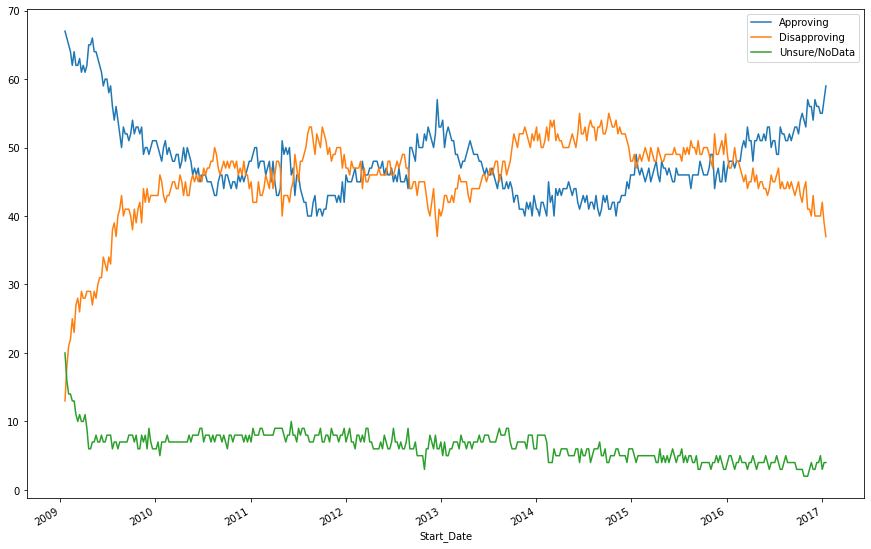

In [107]:
obama_ratings.plot(x="Start_Date", y=["Approving", "Disapproving", "Unsure/NoData"], figsize=(15, 10))
plt.show()

In [108]:
obama_ratings['month_year'] = pd.to_datetime(obama_ratings['End_Date']).dt.to_period('M')
obama_ratings.head()

Start_Date   End_Date  Approving  Disapproving  Unsure/NoData  high  low  \
0 2009-01-19 2009-01-25         67            13             20     1    0   
1 2009-01-26 2009-02-01         66            18             16     1    0   
2 2009-02-02 2009-02-08         65            21             14     1    0   
3 2009-02-09 2009-02-15         64            22             14     1    0   
4 2009-02-16 2009-02-22         62            25             13     1    0   

      President month_year  
0  Barack Obama    2009-01  
1  Barack Obama    2009-02  
2  Barack Obama    2009-02  
3  Barack Obama    2009-02  
4  Barack Obama    2009-02

In [109]:
obama_new_ratings = obama_ratings.groupby('month_year').mean()
obama_new_ratings.head()

Approving  Disapproving  Unsure/NoData  high  low
month_year                                                   
2009-01         67.00          13.0          20.00   1.0  0.0
2009-02         64.25          21.5          14.25   1.0  0.0
2009-03         62.40          26.6          11.00   1.0  0.0
2009-04         62.50          28.5           9.00   1.0  0.0
2009-05         64.40          28.6           7.00   1.0  0.0

In [110]:
obama_new_ratings.reset_index(inplace=True)
obama_new_ratings

month_year  Approving  Disapproving  Unsure/NoData  high  low
0     2009-01      67.00         13.00          20.00   1.0  0.0
1     2009-02      64.25         21.50          14.25   1.0  0.0
2     2009-03      62.40         26.60          11.00   1.0  0.0
3     2009-04      62.50         28.50           9.00   1.0  0.0
4     2009-05      64.40         28.60           7.00   1.0  0.0
..        ...        ...           ...            ...   ...  ...
92    2016-09      52.00         44.00           4.00   1.0  0.0
93    2016-10      53.60         43.60           2.80   1.0  0.0
94    2016-11      55.50         41.75           2.75   1.0  0.0
95    2016-12      55.75         40.75           3.50   1.0  0.0
96    2017-01      56.50         39.50           4.00   1.0  0.0

[97 rows x 6 columns]

In [111]:
obama_speeches['month_year'] = pd.to_datetime(obama_speeches['Date']).dt.to_period('M')
obama_speeches.head()

<ipython-input-111-33ab0e7619ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obama_speeches['month_year'] = pd.to_datetime(obama_speeches['Date']).dt.to_period('M')


Date     President       Party  \
73 2008-08-28  Barack Obama  Democratic   
75 2008-11-04  Barack Obama  Democratic   
80 2009-01-20  Barack Obama  Democratic   
81 2009-01-29  Barack Obama  Democratic   
82 2009-02-07  Barack Obama  Democratic   

                                         Speech Title  \
73  Acceptance Speech at the Democratic National C...   
75                          Remarks on Election Night   
80                                  Inaugural Address   
81  Remarks on the Lilly Ledbetter Fair Pay Restor...   
82  Remarks on the American Recovery and Reinvestm...   

                                           Transcript month_year  
73  To Chairman Dean and my great friend Dick Durb...    2008-08  
75  If there is anyone out there who still doubts ...    2008-11  
80  I stand here today humbled by the task before ...    2009-01  
81  It is fitting that with the very first bill I ...    2009-01  
82  Thank you, everybody. Please have a seat. You ...    2009-02

In [112]:
merged_obama_df = obama_new_ratings.merge(obama_speeches, how='inner', on='month_year')
merged_obama_df.head()

month_year  Approving  Disapproving  Unsure/NoData  high  low       Date  \
0    2009-01      67.00          13.0          20.00   1.0  0.0 2009-01-20   
1    2009-01      67.00          13.0          20.00   1.0  0.0 2009-01-29   
2    2009-02      64.25          21.5          14.25   1.0  0.0 2009-02-07   
3    2009-02      64.25          21.5          14.25   1.0  0.0 2009-02-24   
4    2009-05      64.40          28.6           7.00   1.0  0.0 2009-05-26   

      President       Party  \
0  Barack Obama  Democratic   
1  Barack Obama  Democratic   
2  Barack Obama  Democratic   
3  Barack Obama  Democratic   
4  Barack Obama  Democratic   

                                        Speech Title  \
0                                  Inaugural Address   
1  Remarks on the Lilly Ledbetter Fair Pay Restor...   
2  Remarks on the American Recovery and Reinvestm...   
3         Address Before a Joint Session of Congress   
4  Remarks on Nominating Judge Sonia Sotomayor to...   

                                          Transcript  
0  I stand here today humbled by the task before ...  
1  It is fitting that with the very first bill I ...  
2  Thank you, everybody. Please have a seat. You ...  
3  Madam Speaker, Mr. Vice President, Members of ...  
4  Thank you. Well, be: ( 1 excited, too. ( Laugh...

In [113]:
merged_obama_df.shape

(48, 11)

In [114]:
merged_obama_df

month_year  Approving  Disapproving  Unsure/NoData  high   low       Date  \
0     2009-01      67.00         13.00          20.00  1.00  0.00 2009-01-20   
1     2009-01      67.00         13.00          20.00  1.00  0.00 2009-01-29   
2     2009-02      64.25         21.50          14.25  1.00  0.00 2009-02-07   
3     2009-02      64.25         21.50          14.25  1.00  0.00 2009-02-24   
4     2009-05      64.40         28.60           7.00  1.00  0.00 2009-05-26   
5     2009-06      60.50         32.25           7.25  1.00  0.00 2009-06-04   
6     2009-09      52.00         40.75           7.25  1.00  0.00 2009-09-09   
7     2009-12      50.00         43.00           7.00  0.75  0.25 2009-12-01   
8     2009-12      50.00         43.00           7.00  0.75  0.25 2009-12-10   
9     2010-01      49.80         44.00           6.20  0.60  0.40 2010-01-27   
10    2010-02      50.00         42.75           7.25  0.75  0.25 2010-02-09   
11    2010-03      48.50         44.50           7.00  0.00  1.00 2010-03-15   
12    2010-04      48.50         44.50           7.00  0.25  0.75 2010-04-15   
13    2010-04      48.50         44.50           7.00  0.25  0.75 2010-04-28   
14    2010-06      46.25         45.50           8.25  0.00  1.00 2010-06-15   
15    2010-08      44.00         48.40           7.60  0.00  1.00 2010-08-31   
16    2010-09      45.25         47.00           7.75  0.00  1.00 2010-09-23   
17    2010-11      45.00         47.00           8.00  0.00  1.00 2010-11-03   
18    2011-01      49.00         43.00           8.00  0.40  0.60 2011-01-12   
19    2011-01      49.00         43.00           8.00  0.40  0.60 2011-01-25   
20    2011-05      48.60         43.20           8.20  0.40  0.60 2011-05-01   
21    2011-05      48.60         43.20           8.20  0.40  0.60 2011-05-19   
22    2011-05      48.60         43.20           8.20  0.40  0.60 2011-05-25   
23    2011-06      46.50         45.00           8.50  0.25  0.75 2011-06-22   
24    2011-09      41.50         50.75           7.75  0.00  1.00 2011-09-08   
25    2011-10      41.20         51.00           7.80  0.00  1.00 2011-10-21   
26    2012-01      44.60         47.40           8.00  0.00  1.00 2012-01-24   
27    2012-09      48.20         45.00           6.80  0.40  0.60 2012-09-06   
28    2012-11      52.00         42.25           5.75  1.00  0.00 2012-11-06   
29    2012-12      52.60         40.80           6.60  1.00  0.00 2012-12-16   
30    2013-01      52.25         41.75           6.00  1.00  0.00 2013-01-21   
31    2013-01      52.25         41.75           6.00  1.00  0.00 2013-01-29   
32    2013-02      51.75         42.25           6.00  1.00  0.00 2013-02-13   
33    2013-03      48.20         44.80           7.00  0.00  1.00 2013-03-01   
34    2013-03      48.20         44.80           7.00  0.00  1.00 2013-03-21   
35    2013-04      49.50         43.75           6.75  0.50  0.50 2013-04-08   
36    2013-07      46.25         46.50           7.25  0.00  1.00 2013-07-19   
37    2013-07      46.25         46.50           7.25  0.00  1.00 2013-07-24   
38    2013-09      44.40         47.40           8.20  0.00  1.00 2013-09-10   
39    2013-12      41.60         51.20           7.20  0.00  1.00 2013-12-04   
40    2014-01      41.00         51.50           7.50  0.00  1.00 2014-01-28   
41    2014-11      41.80         52.80           5.40  0.00  1.00 2014-11-20   
42    2015-01      46.75         48.00           5.25  0.00  1.00 2015-01-20   
43    2015-03      45.80         49.20           5.00  0.00  1.00 2015-03-07   
44    2015-06      45.75         49.25           5.00  0.00  1.00 2015-06-26   
45    2016-01      47.20         48.60           4.20  0.00  1.00 2016-01-12   
46    2016-03      51.00         45.25           3.75  1.00  0.00 2016-03-22   
47    2016-05      51.40         44.80           3.80  1.00  0.00 2016-05-15   

       President       Party  \
0   Barack Obama  Democratic   
1   Barack Obama  

In [115]:
obama_speeches

Date     President       Party  \
73  2008-08-28  Barack Obama  Democratic   
75  2008-11-04  Barack Obama  Democratic   
80  2009-01-20  Barack Obama  Democratic   
81  2009-01-29  Barack Obama  Democratic   
82  2009-02-07  Barack Obama  Democratic   
83  2009-02-24  Barack Obama  Democratic   
84  2009-05-26  Barack Obama  Democratic   
85  2009-06-04  Barack Obama  Democratic   
86  2009-09-09  Barack Obama  Democratic   
87  2009-12-01  Barack Obama  Democratic   
88  2009-12-10  Barack Obama  Democratic   
89  2010-01-27  Barack Obama  Democratic   
90  2010-02-09  Barack Obama  Democratic   
91  2010-03-15  Barack Obama  Democratic   
92  2010-04-15  Barack Obama  Democratic   
93  2010-04-28  Barack Obama  Democratic   
94  2010-06-15  Barack Obama  Democratic   
95  2010-08-31  Barack Obama  Democratic   
96  2010-09-23  Barack Obama  Democratic   
97  2010-11-03  Barack Obama  Democratic   
98  2011-01-12  Barack Obama  Democratic   
99  2011-01-25  Barack Obama  Democratic   
100 2011-05-01  Barack Obama  Democratic   
101 2011-05-19  Barack Obama  Democratic   
102 2011-05-25  Barack Obama  Democratic   
103 2011-06-22  Barack Obama  Democratic   
104 2011-09-08  Barack Obama  Democratic   
105 2011-10-21  Barack Obama  Democratic   
106 2012-01-24  Barack Obama  Democratic   
107 2012-09-06  Barack Obama  Democratic   
108 2012-11-06  Barack Obama  Democratic   
109 2012-12-16  Barack Obama  Democratic   
110 2013-01-21  Barack Obama  Democratic   
111 2013-01-29  Barack Obama  Democratic   
112 2013-02-13  Barack Obama  Democratic   
113 2013-03-01  Barack Obama  Democratic   
114 2013-03-21  Barack Obama  Democratic   
115 2013-04-08  Barack Obama  Democratic   
116 2013-07-19  Barack Obama  Democratic   
117 2013-07-24  Barack Obama  Democratic   
118 2013-09-10  Barack Obama  Democratic   
119 2013-12-04  Barack Obama  Democratic   
120 2014-01-28  Barack Obama  Democratic   
121 2014-11-20  Barack Obama  Democratic   
122 2015-01-20  Barack Obama  Democratic   
123 2015-03-07  Barack Obama  Democratic   
124 2015-06-26  Barack Obama  Democratic   
125 2016-01-12  Barack Obama  Democratic   
126 2016-03-22  Barack Obama  Democratic   
127 2016-05-15  Barack Obama  Democratic   

                                          Speech Title  \
73   Acceptance Speech at the Democratic National C...   
75                           Remarks on Election Night   
80                                   Inaugural Address   
81   Remarks on the Lilly Ledbetter Fair Pay Restor...   
82   Remarks on the American Recovery and Reinvestm...   
83          Address Before a Joint Session of Congress   
84   Remarks on Nominating Judge Sonia Sotomayor to...   
85                         Address at Cairo University   
86                  Address to Congress on Health Care   
87      Speech on Strategy in Afghanistan and Pakistan   
88                     Acceptance of Nobel Peace Prize   
89                     2010 State of the Union Address   
90           News Conference on Congressional Gridlock   
91                        Speech on Health Care Reform   
92    Remarks on Space Exploration in the 21st Century   
93                       Remarks on Wall Street Reform   
94                          Speech on the BP Oil Spill   
95    Address on the End of the Combat Mission in Iraq   
96                       Address to the United Nations   
97       Press Conference After 2010 Midterm Elections   
98   Remarks at Memorial for Victims of the Tucson,...   
99                     2011 State of the Union Address   
100            Remarks on the Death of Osama Bin Laden   
101  Speech on American Diplomacy in the Middle Eas...   
102                  Address to the British Parliament   
103                 Remarks on the Afghanistan Pullout   
104       Address to Congress on the American Jobs Act   
105              Remarks on the End of the War in Iraq   
106                    2012 State of the Union Address   
107  Nominee Acceptance S

In [116]:
obama_speeches.shape

(50, 6)

In [ ]:
obama_freq_high = merged_obama_df[merged_obama_df['high']==1]
obama_freq_low = merged_obama_df[merged_obama_df['high']==0]

In [ ]:
obama_high = obama_freq_high['Transcript']
obama_low = obama_freq_low['Transcript']

In [ ]:
obama_pros_high = [d.split() for d in obam_high.to_list()]
obama_pros_low = [d.split() for d in obama_low.to_list()]

In [ ]:
obama_total_vocab_high = set()
for comment in obama_pros_high:
    obama_total_vocab_high.update([c.lower() for c in comment])
len(obama_total_vocab_high)

In [ ]:
obama_total_vocab_low = set()
for comment in bush_pros_low:
    bush_total_vocab_low.update([c.lower() for c in comment])
len(obama_total_vocab_low)

In [ ]:
obama_flat_high = [item.lower() for sublist in obama_pros_high for item in sublist if item not in sw_list]
obama_flat_low = [item.lower() for sublist in obama_pros_low for item in sublist if item not in sw_list]

In [ ]:
obama_high_freq = FreqDist(obama_flat_high)
obama_low_freq = FreqDist(obama_flat_low)

In [ ]:
obama_high_total_word_count = sum(obama_high_freq.values())
obama_high_top_25 = obama_high_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in obama_high_top_25:
    normalized_frequency = word[1]/obama_high_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

In [ ]:
obama_low_total_word_count = sum(obama_low_freq.values())
obama_low_top_25 = obama_low_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in obama_low_top_25:
    normalized_frequency = word[1]/obama_low_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

In [ ]:
obama_high_bar_counts = [x[1] for x in obama_high_freq.most_common(25)]
obama_high_bar_words = [x[0] for x in obama_high_freq.most_common(25)]

obama_low_bar_counts = [x[1] for x in obama_low_freq.most_common(25)]
obama_low_bar_words = [x[0] for x in obama_low_freq.most_common(25)]

In [ ]:
color = cm.viridis_r(np.linspace(.4,.8, 30))

In [ ]:
new_figure = plt.figure(figsize=(16,15))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(obama_high_bar_words, obama_high_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(obama_low_bar_words, obama_low_bar_counts, color=color )

ax.title.set_text('High Presidential Job Approval Ratings')
ax2.title.set_text('Low Presidential Job Approval Ratings')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

In [ ]:
obama_high_dictionary = dict(zip(obama_high_bar_words, obama_high_bar_counts))
obama_low_dictionary = dict(zip(obama_low_bar_words, obama_low_bar_counts))

In [ ]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(obama_high_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

In [ ]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(obama_low_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

# President Trump

In [117]:
trump_speeches=new_df[(new_df['President'] == 'Donald Trump')]
trump_speeches.head()

Date     President       Party  \
128 2017-01-20  Donald Trump  Republican   
129 2017-02-28  Donald Trump  Republican   
130 2017-06-29  Donald Trump  Republican   
131 2017-07-24  Donald Trump  Republican   
132 2017-09-19  Donald Trump  Republican   

                                       Speech Title  \
128                               Inaugural Address   
129            Address to Joint Session of Congress   
130  Speech at the Unleashing American Energy Event   
131                Speech at the Boy Scout Jamboree   
132  Address to the United Nations General Assembly   

                                            Transcript  
128  Chief Justice Roberts, President Carter, Presi...  
129  Mr. Speaker, Mr. Vice President, Members of Co...  
130  Thank you, everybody. Thank you very much. How...  
131  TRUMP: Thank you, everybody. Thank you very mu...  
132  Mr. Secretary General, Mr. President, world le...

In [118]:
trump_speeches

Date     President       Party  \
128 2017-01-20  Donald Trump  Republican   
129 2017-02-28  Donald Trump  Republican   
130 2017-06-29  Donald Trump  Republican   
131 2017-07-24  Donald Trump  Republican   
132 2017-09-19  Donald Trump  Republican   
133 2017-12-18  Donald Trump  Republican   
134 2018-01-26  Donald Trump  Republican   
135 2018-01-30  Donald Trump  Republican   
136 2018-02-01  Donald Trump  Republican   
137 2018-02-15  Donald Trump  Republican   
138 2018-02-23  Donald Trump  Republican   
139 2018-03-19  Donald Trump  Republican   
140 2018-07-24  Donald Trump  Republican   
141 2018-09-25  Donald Trump  Republican   
142 2019-01-19  Donald Trump  Republican   
143 2019-02-05  Donald Trump  Republican   
144 2019-02-15  Donald Trump  Republican   
145 2019-09-24  Donald Trump  Republican   
146 2019-09-25  Donald Trump  Republican   

                                          Speech Title  \
128                                  Inaugural Address   
129               Address to Joint Session of Congress   
130     Speech at the Unleashing American Energy Event   
131                   Speech at the Boy Scout Jamboree   
132     Address to the United Nations General Assembly   
133              Remarks on National Security Strategy   
134                Address at the World Economic Forum   
135                         State of the Union Address   
136  Remarks at the House and Senate Republican Mem...   
137  Statement on the School Shooting in Parkland, ...   
138  Remarks at the Conservative Political Action C...   
139             Remarks on Combating the Opioid Crisis   
140  Speech at the Veterans of Foreign Wars Nationa...   
141  Address at the 73rd Session of the United Nati...   
142               Remarks about the US Southern Border   
143                         State of the Union Address   
144              Speech Declaring a National Emergency   
145     Remarks at the United Nations General Assembly   
146                                   Press Conference   

                                            Transcript  
128  Chief Justice Roberts, President Carter, Presi...  
129  Mr. Speaker, Mr. Vice President, Members of Co...  
130  Thank you, everybody. Thank you very much. How...  
131  TRUMP: Thank you, everybody. Thank you very mu...  
132  Mr. Secretary General, Mr. President, world le...  
133  Thank you very much. Thank you. Please. I want...  
134  Thank you, Klaus, very much. It's a privilege ...  
135  Mr. Speaker, Mr. Vice President, Members of Co...  
136  Thank you, Paul and Mitch, for the introductio...  
137  My fellow Americans, today I speak to a nation...  
138  Thank you very much. Thank you everybody. Than...  
139  Thank you to our First Lady, Melania, who has ...  
140  Thank you, Lee. Thank you, Lee. Thank you. And...  
141  Madam President, Mr. Secretary-General, world ...  
142  Just a short time ago, I had the honor of pres...  
143  Madam Speaker, Mr. Vice President, Members of ...  
144  Thank you very much, everybody. Before we begi...  
145  Thank you very much. Mr. President, Mr. Secret...  
146  Thank you very much. Thank you. Well, thank yo...

In [119]:
trump_ratings = pd.read_csv('American Presidency Project - Approval Ratings for POTUS - Donald Trump.csv')
trump_ratings

Start Date    End Date  Approving  Disapproving  Unsure/NoData
0    01/04/2021  01/15/2021         34            62              4
1    12/01/2020  12/17/2020         39            57              4
2    11/05/2020  11/19/2020         43            55              2
3    10/16/2020  10/27/2020         46            52              2
4    09/30/2020  10/15/2020         43            55              2
..          ...         ...        ...           ...            ...
136  02/20/2017  02/26/2017         42            53              5
137  02/13/2017  02/19/2017         40            54              6
138  02/06/2017  02/12/2017         41            53              6
139  01/30/2017  02/05/2017         43            52              5
140  01/20/2017  01/29/2017         45            47              8

[141 rows x 5 columns]

In [120]:
trump_ratings.nunique()

Start Date       141
End Date         141
Approving         15
Disapproving      15
Unsure/NoData      8
dtype: int64

In [121]:
trump_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Start Date     141 non-null    object
 1   End Date       141 non-null    object
 2   Approving      141 non-null    int64 
 3   Disapproving   141 non-null    int64 
 4   Unsure/NoData  141 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 5.6+ KB


In [122]:
trump_ratings.describe()

Approving  Disapproving  Unsure/NoData
count  141.000000    141.000000     141.000000
mean    40.382979     54.907801       4.709220
std      3.118286      2.863317       1.256634
min     34.000000     45.000000       1.000000
25%     38.000000     53.000000       4.000000
50%     40.000000     55.000000       5.000000
75%     42.000000     57.000000       6.000000
max     49.000000     62.000000       8.000000

In [123]:
trump_ratings['high'], trump_ratings['low'] = (trump_ratings.Approving >= 50).astype(int), (~(trump_ratings.Approving >=50)).astype(int)
trump_ratings

Start Date    End Date  Approving  Disapproving  Unsure/NoData  high  low
0    01/04/2021  01/15/2021         34            62              4     0    1
1    12/01/2020  12/17/2020         39            57              4     0    1
2    11/05/2020  11/19/2020         43            55              2     0    1
3    10/16/2020  10/27/2020         46            52              2     0    1
4    09/30/2020  10/15/2020         43            55              2     0    1
..          ...         ...        ...           ...            ...   ...  ...
136  02/20/2017  02/26/2017         42            53              5     0    1
137  02/13/2017  02/19/2017         40            54              6     0    1
138  02/06/2017  02/12/2017         41            53              6     0    1
139  01/30/2017  02/05/2017         43            52              5     0    1
140  01/20/2017  01/29/2017         45            47              8     0    1

[141 rows x 7 columns]

In [124]:
X = trump_ratings.drop('high', axis=1)
y = trump_ratings[['high']]
y.head()

high
0     0
1     0
2     0
3     0
4     0

In [125]:
trump_ratings['Start Date'] = pd.to_datetime(trump_ratings['Start Date'])
trump_ratings['End Date'] = pd.to_datetime(trump_ratings['End Date'])
trump_ratings.head()

Start Date   End Date  Approving  Disapproving  Unsure/NoData  high  low
0 2021-01-04 2021-01-15         34            62              4     0    1
1 2020-12-01 2020-12-17         39            57              4     0    1
2 2020-11-05 2020-11-19         43            55              2     0    1
3 2020-10-16 2020-10-27         46            52              2     0    1
4 2020-09-30 2020-10-15         43            55              2     0    1

In [126]:
trump_ratings['President'] = 'Donald Trump'

In [127]:
trump_ratings.rename(columns={'Start Date': 'Start_Date', 'End Date': 'End_Date'}, inplace=True)
trump_ratings.head()

Start_Date   End_Date  Approving  Disapproving  Unsure/NoData  high  low  \
0 2021-01-04 2021-01-15         34            62              4     0    1   
1 2020-12-01 2020-12-17         39            57              4     0    1   
2 2020-11-05 2020-11-19         43            55              2     0    1   
3 2020-10-16 2020-10-27         46            52              2     0    1   
4 2020-09-30 2020-10-15         43            55              2     0    1   

      President  
0  Donald Trump  
1  Donald Trump  
2  Donald Trump  
3  Donald Trump  
4  Donald Trump

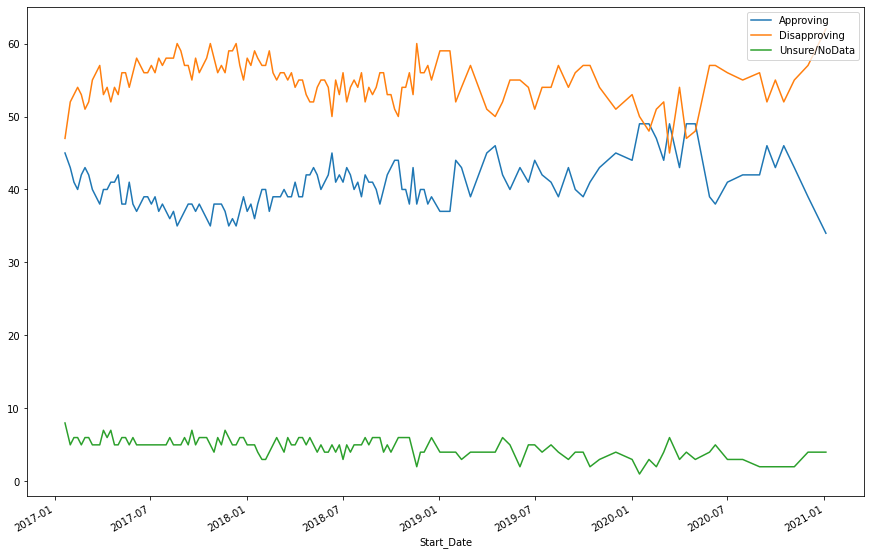

In [128]:
trump_ratings.plot(x="Start_Date", y=["Approving", "Disapproving", "Unsure/NoData"], figsize=(15, 10))
plt.legend(loc='upper right')
plt.show()

In [129]:
trump_ratings['month_year'] = pd.to_datetime(trump_ratings['End_Date']).dt.to_period('M')
trump_ratings.head()

Start_Date   End_Date  Approving  Disapproving  Unsure/NoData  high  low  \
0 2021-01-04 2021-01-15         34            62              4     0    1   
1 2020-12-01 2020-12-17         39            57              4     0    1   
2 2020-11-05 2020-11-19         43            55              2     0    1   
3 2020-10-16 2020-10-27         46            52              2     0    1   
4 2020-09-30 2020-10-15         43            55              2     0    1   

      President month_year  
0  Donald Trump    2021-01  
1  Donald Trump    2020-12  
2  Donald Trump    2020-11  
3  Donald Trump    2020-10  
4  Donald Trump    2020-10

In [130]:
trump_new_ratings = trump_ratings.groupby('month_year').mean()
trump_new_ratings.head()

Approving  Disapproving  Unsure/NoData  high  low
month_year                                                   
2017-01         45.00         47.00            8.0   0.0  1.0
2017-02         41.50         53.00            5.5   0.0  1.0
2017-03         41.00         53.50            5.5   0.0  1.0
2017-04         40.00         54.00            6.0   0.0  1.0
2017-05         39.75         54.75            5.5   0.0  1.0

In [131]:
trump_new_ratings.reset_index(inplace=True)
trump_new_ratings

month_year  Approving  Disapproving  Unsure/NoData  high  low
0     2017-01      45.00         47.00           8.00   0.0  1.0
1     2017-02      41.50         53.00           5.50   0.0  1.0
2     2017-03      41.00         53.50           5.50   0.0  1.0
3     2017-04      40.00         54.00           6.00   0.0  1.0
4     2017-05      39.75         54.75           5.50   0.0  1.0
5     2017-06      38.00         56.75           5.25   0.0  1.0
6     2017-07      38.20         56.80           5.00   0.0  1.0
7     2017-08      36.25         58.50           5.25   0.0  1.0
8     2017-09      37.25         57.00           5.75   0.0  1.0
9     2017-10      36.60         57.80           5.60   0.0  1.0
10    2017-11      37.75         56.75           5.50   0.0  1.0
11    2017-12      36.40         58.00           5.60   0.0  1.0
12    2018-01      37.25         58.00           4.75   0.0  1.0
13    2018-02      39.00         57.25           3.75   0.0  1.0
14    2018-03      39.25         55.50           5.25   0.0  1.0
15    2018-04      40.00         54.60           5.40   0.0  1.0
16    2018-05      41.75         53.25           5.00   0.0  1.0
17    2018-06      42.25         53.50           4.25   0.0  1.0
18    2018-07      41.60         54.00           4.40   0.0  1.0
19    2018-08      40.75         54.00           5.25   0.0  1.0
20    2018-09      40.20         54.40           5.40   0.0  1.0
21    2018-10      42.75         52.00           5.25   0.0  1.0
22    2018-11      39.75         55.75           4.50   0.0  1.0
23    2018-12      39.25         56.00           4.75   0.0  1.0
24    2019-01      37.00         59.00           4.00   0.0  1.0
25    2019-02      43.50         53.00           3.50   0.0  1.0
26    2019-03      39.00         57.00           4.00   0.0  1.0
27    2019-04      45.50         50.50           4.00   0.0  1.0
28    2019-05      41.00         53.50           5.50   0.0  1.0
29    2019-06      42.00         54.50           3.50   0.0  1.0
30    2019-07      43.00         52.50           4.50   0.0  1.0
31    2019-08      40.00         55.50           4.50   0.0  1.0
32    2019-09      41.50         55.00           3.50   0.0  1.0
33    2019-10      40.00         57.00           3.00   0.0  1.0
34    2019-11      43.00         54.00           3.00   0.0  1.0
35    2019-12      45.00         51.00           4.00   0.0  1.0
36    2020-01      46.50         51.50           2.00   0.0  1.0
37    2020-02      48.00         49.50           2.50   0.0  1.0
38    2020-03      46.50         48.50           5.00   0.0  1.0
39    2020-04      46.00         50.50           3.50   0.0  1.0
40    2020-05      49.00         48.00           3.00   0.0  1.0
41    2020-06      38.50         57.00           4.50   0.0  1.0
42    2020-07      41.00         56.00           3.00   0.0  1.0
43    2020-08      42.00         55.00           3.00   0.0  1.0
44    2020-09      44.00         54.00           2.00   0.0  1.0
45    2020-10      44.50         53.50           2.00   0.0  1.0
46    2020-11      43.00         55.00           2.00   0.0  1.0
47    2020-12      39.00         57.00           4.00   0.0  1.0
48    2021-01      34.00         62.00           4.00   0.0  1.0

In [132]:
trump_speeches['month_year'] = pd.to_datetime(trump_speeches['Date']).dt.to_period('M')
trump_speeches.head()

<ipython-input-132-f311af87aba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_speeches['month_year'] = pd.to_datetime(trump_speeches['Date']).dt.to_period('M')


Date     President       Party  \
128 2017-01-20  Donald Trump  Republican   
129 2017-02-28  Donald Trump  Republican   
130 2017-06-29  Donald Trump  Republican   
131 2017-07-24  Donald Trump  Republican   
132 2017-09-19  Donald Trump  Republican   

                                       Speech Title  \
128                               Inaugural Address   
129            Address to Joint Session of Congress   
130  Speech at the Unleashing American Energy Event   
131                Speech at the Boy Scout Jamboree   
132  Address to the United Nations General Assembly   

                                            Transcript month_year  
128  Chief Justice Roberts, President Carter, Presi...    2017-01  
129  Mr. Speaker, Mr. Vice President, Members of Co...    2017-02  
130  Thank you, everybody. Thank you very much. How...    2017-06  
131  TRUMP: Thank you, everybody. Thank you very mu...    2017-07  
132  Mr. Secretary General, Mr. President, world le...    2017-09

In [133]:
merged_trump_df = trump_new_ratings.merge(trump_speeches, how='inner', on='month_year')
merged_trump_df.head()

month_year  Approving  Disapproving  Unsure/NoData  high  low       Date  \
0    2017-01      45.00         47.00           8.00   0.0  1.0 2017-01-20   
1    2017-02      41.50         53.00           5.50   0.0  1.0 2017-02-28   
2    2017-06      38.00         56.75           5.25   0.0  1.0 2017-06-29   
3    2017-07      38.20         56.80           5.00   0.0  1.0 2017-07-24   
4    2017-09      37.25         57.00           5.75   0.0  1.0 2017-09-19   

      President       Party                                    Speech Title  \
0  Donald Trump  Republican                               Inaugural Address   
1  Donald Trump  Republican            Address to Joint Session of Congress   
2  Donald Trump  Republican  Speech at the Unleashing American Energy Event   
3  Donald Trump  Republican                Speech at the Boy Scout Jamboree   
4  Donald Trump  Republican  Address to the United Nations General Assembly   

                                          Transcript  
0  Chief Justice Roberts, President Carter, Presi...  
1  Mr. Speaker, Mr. Vice President, Members of Co...  
2  Thank you, everybody. Thank you very much. How...  
3  TRUMP: Thank you, everybody. Thank you very mu...  
4  Mr. Secretary General, Mr. President, world le...

In [134]:
merged_trump_df.shape

(19, 11)

In [135]:
trump_speeches.shape

(19, 6)

# Combined Presidential Job Approval Ratings

In [136]:
combined_df = [merged_clinton_df, merged_bush_df, merged_obama_df, merged_trump_df]
presidential_df = pd.concat(combined_df)
presidential_df.head()

month_year  Approving  Disapproving  Unsure/NoData  high  low       Date  \
0    1993-01       56.0          25.0           19.0   1.0  0.0 1993-01-20   
1    1993-01       56.0          25.0           19.0   1.0  0.0 1993-01-29   
2    1993-02       55.0          31.5           13.5   1.0  0.0 1993-02-05   
3    1993-02       55.0          31.5           13.5   1.0  0.0 1993-02-17   
4    1993-04       55.0          37.0            8.0   1.0  0.0 1993-04-30   

      President       Party  \
0  Bill Clinton  Democratic   
1  Bill Clinton  Democratic   
2  Bill Clinton  Democratic   
3  Bill Clinton  Democratic   
4  Bill Clinton  Democratic   

                                        Speech Title  \
0                                    First Inaugural   
1         Press Conference on "Gays in the Military"   
2  Remarks at the Signing of the Family Medical L...   
3         Address Before a Joint Session of Congress   
4                           National Service Address   

                                          Transcript  
0  My fellow citizens, today we celebrate the mys...  
1  The President. Good afternoon, ladies and gent...  
2  Thank you very much, thank you. Mrs. Yandle, I...  
3  Mr. President, Mr. Speaker, Members of the Hou...  
4  It is wonderful to be back in New Orleans and ...

In [137]:
presidential_df.shape

(143, 11)

In [138]:
presidential_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 18
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   month_year     143 non-null    period[M]     
 1   Approving      143 non-null    float64       
 2   Disapproving   143 non-null    float64       
 3   Unsure/NoData  143 non-null    float64       
 4   high           143 non-null    float64       
 5   low            143 non-null    float64       
 6   Date           143 non-null    datetime64[ns]
 7   President      143 non-null    object        
 8   Party          143 non-null    object        
 9   Speech Title   143 non-null    object        
 10  Transcript     143 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(4), period[M](1)
memory usage: 13.4+ KB


In [139]:
presidential_df['high'] = presidential_df['high'].astype(int)

In [140]:
presidential_data = presidential_df['Transcript']
presidential_target = presidential_df['high']

In [141]:
processed_data = [d.split() for d in presidential_data.to_list()]
print(processed_data[:2])

[['My', 'fellow', 'citizens,', 'today', 'we', 'celebrate', 'the', 'mystery', 'of', 'American', 'renewal.', 'This', 'ceremony', 'is', 'held', 'in', 'the', 'depth', 'of', 'winter,', 'but', 'by', 'the', 'words', 'we', 'speak', 'and', 'the', 'faces', 'we', 'show', 'the', 'world,', 'we', 'force', 'the', 'spring,', 'a', 'spring', 'reborn', 'in', 'the', "world's", 'oldest', 'democracy', 'that', 'brings', 'forth', 'the', 'vision', 'and', 'courage', 'to', 'reinvent', 'America.', 'When', 'our', 'Founders', 'boldly', 'declared', "America's", 'independence', 'to', 'the', 'world', 'and', 'our', 'purposes', 'to', 'the', 'Almighty,', 'they', 'knew', 'that', 'America,', 'to', 'endure,', 'would', 'have', 'to', 'change;', 'not', 'change', 'for', "change's", 'sake', 'but', 'change', 'to', 'preserve', "America's", 'ideals:', 'life,', 'liberty,', 'the', 'pursuit', 'of', 'happiness.', 'Though', 'we', 'marched', 'to', 'the', 'music', 'of', 'our', 'time,', 'our', 'mission', 'is', 'timeless.', 'Each', 'generat

In [142]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update([c.lower() for c in comment])
len(total_vocab)

27840

In [143]:
lemmatizer = WordNetLemmatizer()

In [144]:
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [145]:
lemmatized_output[0]

"My fellow citizens, today we celebrate the mystery of American renewal. This ceremony is held in the depth of winter, but by the word we speak and the face we show the world, we force the spring, a spring reborn in the world's oldest democracy that brings forth the vision and courage to reinvent America. When our Founders boldly declared America's independence to the world and our purpose to the Almighty, they knew that America, to endure, would have to change; not change for change's sake but change to preserve America's ideals: life, liberty, the pursuit of happiness. Though we marched to the music of our time, our mission is timeless. Each generation of Americans must define what it mean to be an American. On behalf of our Nation, I salute my predecessor, President Bush, for his half-century of service to America. And I thank the million of men and woman whose steadfastness and sacrifice triumphed over depression, fascism, and communism. Today, a generation raised in the shadow of 

In [146]:
X_lem = lemmatized_output

y_lem = presidential_target

In [147]:
X_lem

["My fellow citizens, today we celebrate the mystery of American renewal. This ceremony is held in the depth of winter, but by the word we speak and the face we show the world, we force the spring, a spring reborn in the world's oldest democracy that brings forth the vision and courage to reinvent America. When our Founders boldly declared America's independence to the world and our purpose to the Almighty, they knew that America, to endure, would have to change; not change for change's sake but change to preserve America's ideals: life, liberty, the pursuit of happiness. Though we marched to the music of our time, our mission is timeless. Each generation of Americans must define what it mean to be an American. On behalf of our Nation, I salute my predecessor, President Bush, for his half-century of service to America. And I thank the million of men and woman whose steadfastness and sacrifice triumphed over depression, fascism, and communism. Today, a generation raised in the shadow of

In [148]:
pres_freq_high = presidential_df[presidential_df['high']==1]
pres_freq_low = presidential_df[presidential_df['high']==0]

In [149]:
pres_high = pres_freq_high['Transcript']
pres_low = pres_freq_low['Transcript']

In [150]:
pros_high = [d.split() for d in pres_high.to_list()]
pros_low = [d.split() for d in pres_low.to_list()]

In [151]:
total_word_high = set()
for comment in pros_high:
    total_word_high.update([c.lower() for c in comment])
len(total_word_high)

16145

In [152]:
total_word_low = set()
for comment in pros_low:
    total_word_low.update([c.lower() for c in comment])
len(total_word_low)

22158

In [153]:
flat_high = [item.lower() for sublist in pros_high for item in sublist if item not in sw_list ]
flat_low = [item.lower() for sublist in pros_low for item in sublist if item not in sw_list]

In [154]:
high_freq = FreqDist(flat_high)
low_freq = FreqDist(flat_low)

In [155]:
high_freq.most_common(20)

[('i', 1834),
 ('and', 973),
 ('we', 932),
 ('people', 721),
 ('must', 632),
 ('new', 593),
 ('the', 547),
 ('every', 528),
 ('us', 470),
 ('america', 457),
 ('american', 441),
 ('one', 403),
 ('but', 392),
 ('make', 380),
 ('work', 357),
 ('know', 349),
 ('world', 313),
 ('in', 311),
 ('help', 302),
 ('want', 301)]

In [156]:
low_freq.most_common(20)

[('i', 3507),
 ('and', 2501),
 ('we', 1519),
 ('people', 1381),
 ('but', 958),
 ('the', 914),
 ('us', 812),
 ('new', 807),
 ('american', 799),
 ('one', 771),
 ('going', 740),
 ("that's", 738),
 ("we're", 724),
 ('make', 699),
 ('want', 672),
 ('must', 612),
 ('america', 606),
 ('would', 598),
 ('every', 586),
 ('get', 568)]

In [157]:
high_total_word_count = sum(high_freq.values())
high_top_25 = high_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in high_top_25:
    normalized_frequency = word[1]/high_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

i 		 0.01694
and 		 0.008988
we 		 0.00861
people 		 0.00666
must 		 0.005838
new 		 0.005478
the 		 0.005053
every 		 0.004878
us 		 0.004342
america 		 0.004222
american 		 0.004074
one 		 0.003723
but 		 0.003621
make 		 0.00351
work 		 0.003298
know 		 0.003224
world 		 0.002891
in 		 0.002873
help 		 0.00279
want 		 0.002781
health 		 0.002697
many 		 0.002679
americans 		 0.002596
thank 		 0.002522
also 		 0.002522


In [158]:
low_total_word_count = sum(low_freq.values())
low_top_25 = low_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in low_top_25:
    normalized_frequency = word[1]/low_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

i 		 0.01833
and 		 0.01307
we 		 0.007938
people 		 0.007217
but 		 0.005006
the 		 0.004776
us 		 0.004243
new 		 0.004217
american 		 0.004176
one 		 0.004029
going 		 0.003867
that's 		 0.003857
we're 		 0.003784
make 		 0.003653
want 		 0.003512
must 		 0.003198
america 		 0.003167
would 		 0.003125
every 		 0.003062
get 		 0.002968
know 		 0.002911
work 		 0.002822
like 		 0.002759
so 		 0.002707
also 		 0.002702


In [159]:
high_bar_counts = [x[1] for x in high_freq.most_common(25)]
high_bar_words = [x[0] for x in high_freq.most_common(25)]

low_bar_counts = [x[1] for x in low_freq.most_common(25)]
low_bar_words = [x[0] for x in low_freq.most_common(25)]

In [160]:
color = cm.viridis_r(np.linspace(.4,.8, 30))

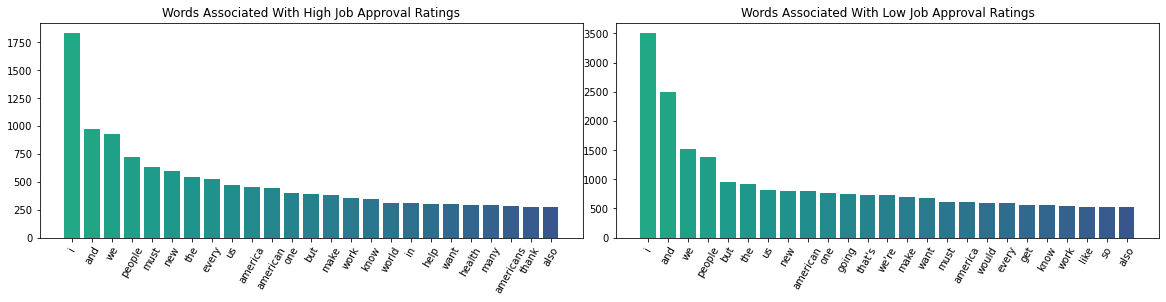

In [161]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(high_bar_words, high_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(low_bar_words, low_bar_counts, color=color )

ax.title.set_text('Words Associated With High Job Approval Ratings')
ax2.title.set_text('Words Associated With Low Job Approval Ratings')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

In [162]:
from wordcloud import WordCloud
high_dictionary = dict(zip(high_bar_words, high_bar_counts))
low_dictionary = dict(zip(low_bar_words, low_bar_counts))

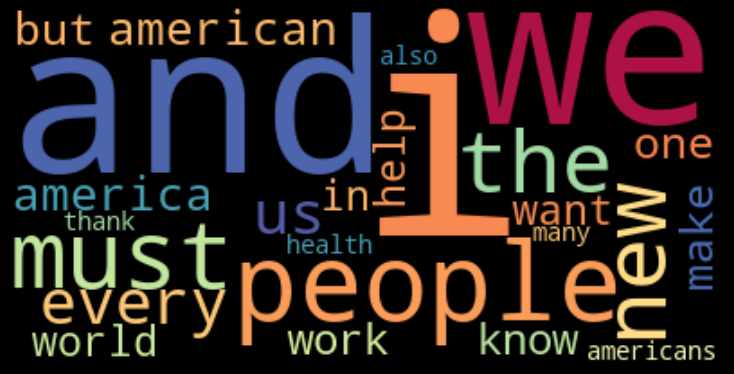

In [163]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(high_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

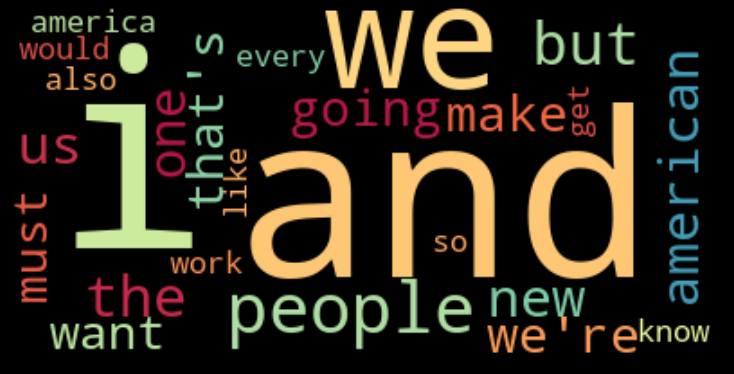

In [164]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(low_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')

plt.show()

# Initial Models

## RandomForest

In [165]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_set)

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<114x13490 sparse matrix of type '<class 'numpy.float64'>'
	with 100116 stored elements in Compressed Sparse Row format>

In [166]:
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 878.2105263157895
Percentage of columns containing ZERO: 0.9348991455659162


In [167]:
rf_classifier_lem = RandomForestClassifier(n_estimators=100, random_state=0)

In [168]:
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)

rf_train_preds_lem = rf_classifier_lem.predict(tfidf_data_train_lem)
rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)

In [169]:
print(classification_report(y_train_lem, rf_train_preds_lem))
print(classification_report(y_test_lem, rf_test_preds_lem))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        16
           1       1.00      0.15      0.27        13

    accuracy                           0.62        29
   macro avg       0.80      0.58      0.51        29
weighted avg       0.78      0.62      0.53        29



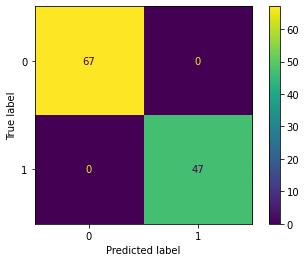

In [170]:
plot_confusion_matrix(rf_classifier_lem, tfidf_data_train_lem, y_train_lem);

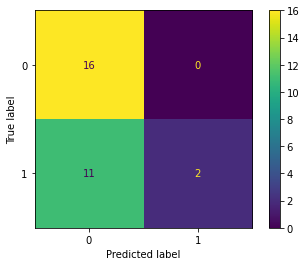

In [171]:
plot_confusion_matrix(rf_classifier_lem, tfidf_data_test_lem, y_test_lem);

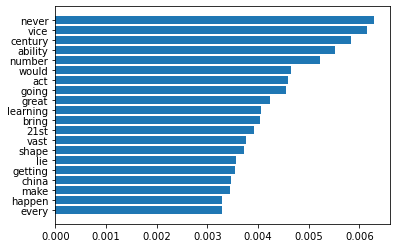

In [172]:
importances = sorted(list(zip(rf_classifier_lem.feature_importances_, tfidf.get_feature_names())))[-20:]
impts = pd.DataFrame(importances, columns=['impt', 'feat'])
plt.barh(impts.feat, impts.impt);

## Naive Bayes

In [173]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_set)

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<114x13490 sparse matrix of type '<class 'numpy.float64'>'
	with 100116 stored elements in Compressed Sparse Row format>

In [174]:
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 878.2105263157895
Percentage of columns containing ZERO: 0.9348991455659162


In [175]:
naive_bayes_lem = MultinomialNB()

In [176]:
naive_bayes_lem.fit(tfidf_data_train_lem, y_train_lem)

naive_train_preds_lem = naive_bayes_lem.predict(tfidf_data_train_lem)
naive_test_preds_lem = naive_bayes_lem.predict(tfidf_data_test_lem)

In [177]:
print(classification_report(y_train_lem, naive_train_preds_lem))
print(classification_report(y_test_lem, naive_test_preds_lem))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        67
           1       1.00      0.04      0.08        47

    accuracy                           0.61       114
   macro avg       0.80      0.52      0.42       114
weighted avg       0.76      0.61      0.47       114

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        16
           1       0.00      0.00      0.00        13

    accuracy                           0.55        29
   macro avg       0.28      0.50      0.36        29
weighted avg       0.30      0.55      0.39        29



/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


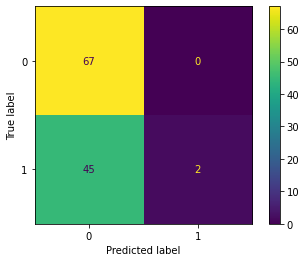

In [178]:
plot_confusion_matrix(naive_bayes_lem, tfidf_data_train_lem, y_train_lem);

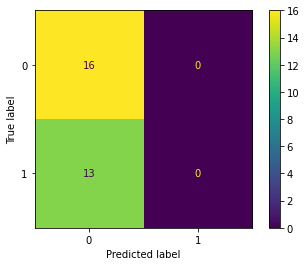

In [179]:
plot_confusion_matrix(naive_bayes_lem, tfidf_data_test_lem, y_test_lem);

## Logistic Regression

In [180]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_set)

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<114x13490 sparse matrix of type '<class 'numpy.float64'>'
	with 100116 stored elements in Compressed Sparse Row format>

In [181]:
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 878.2105263157895
Percentage of columns containing ZERO: 0.9348991455659162


In [182]:
log_model_lem = LogisticRegression()

In [183]:
log_model_lem.fit(tfidf_data_train_lem, y_train_lem)

log_train_preds_lem = log_model_lem.predict(tfidf_data_train_lem)
log_test_preds_lem = log_model_lem.predict(tfidf_data_test_lem)

In [184]:
print(classification_report(y_train_lem, log_train_preds_lem))
print(classification_report(y_test_lem, log_test_preds_lem))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        67
           1       1.00      0.70      0.82        47

    accuracy                           0.88       114
   macro avg       0.91      0.85      0.87       114
weighted avg       0.90      0.88      0.87       114

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        16
           1       0.00      0.00      0.00        13

    accuracy                           0.55        29
   macro avg       0.28      0.50      0.36        29
weighted avg       0.30      0.55      0.39        29



/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


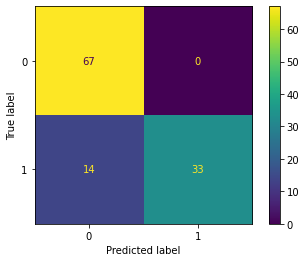

In [185]:
plot_confusion_matrix(log_model_lem, tfidf_data_train_lem, y_train_lem);

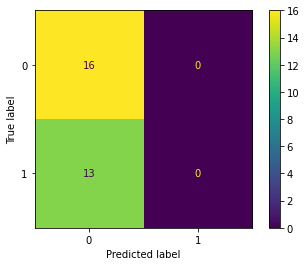

In [186]:
plot_confusion_matrix(log_model_lem, tfidf_data_test_lem, y_test_lem);

## Decision Tree

In [187]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_set)

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<114x13490 sparse matrix of type '<class 'numpy.float64'>'
	with 100116 stored elements in Compressed Sparse Row format>

In [188]:
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 878.2105263157895
Percentage of columns containing ZERO: 0.9348991455659162


In [189]:
Dtree_lem = DecisionTreeClassifier()

In [190]:
Dtree_lem.fit(tfidf_data_train_lem, y_train_lem)

Dtree_train_preds_lem = Dtree_lem.predict(tfidf_data_train_lem)
Dtree_test_preds_lem = Dtree_lem.predict(tfidf_data_test_lem)

In [191]:
print(classification_report(y_train_lem, Dtree_train_preds_lem))
print(classification_report(y_test_lem, Dtree_test_preds_lem))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

              precision    recall  f1-score   support

           0       0.57      0.75      0.65        16
           1       0.50      0.31      0.38        13

    accuracy                           0.55        29
   macro avg       0.54      0.53      0.51        29
weighted avg       0.54      0.55      0.53        29



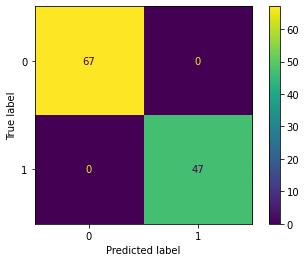

In [192]:
plot_confusion_matrix(Dtree_lem, tfidf_data_train_lem, y_train_lem);

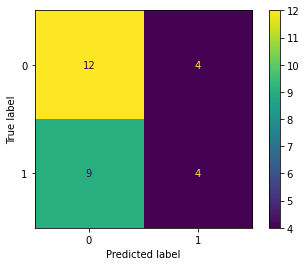

In [193]:
plot_confusion_matrix(Dtree_lem, tfidf_data_test_lem, y_test_lem);

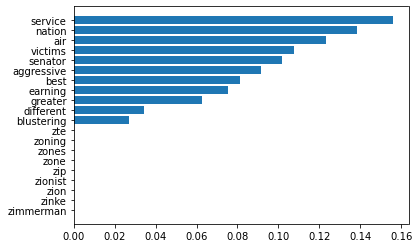

In [194]:
importances = sorted(list(zip(Dtree_lem.feature_importances_, tfidf.get_feature_names())))[-20:]
impts = pd.DataFrame(importances, columns=['impt', 'feat'])
plt.barh(impts.feat, impts.impt);

## XGBoost

In [195]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_set)

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<114x13490 sparse matrix of type '<class 'numpy.float64'>'
	with 100116 stored elements in Compressed Sparse Row format>

In [196]:
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 878.2105263157895
Percentage of columns containing ZERO: 0.9348991455659162


In [197]:
XG_lem = XGBClassifier()

In [198]:
XG_lem.fit(tfidf_data_train_lem, y_train_lem)

XG_train_preds_lem = XG_lem.predict(tfidf_data_train_lem)
XG_test_preds_lem = XG_lem.predict(tfidf_data_test_lem)

In [199]:
print(classification_report(y_train_lem, XG_train_preds_lem))
print(classification_report(y_test_lem, XG_test_preds_lem))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.70      0.54      0.61        13

    accuracy                           0.69        29
   macro avg       0.69      0.68      0.68        29
weighted avg       0.69      0.69      0.68        29



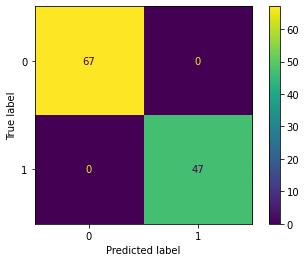

In [200]:
plot_confusion_matrix(XG_lem, tfidf_data_train_lem, y_train_lem);

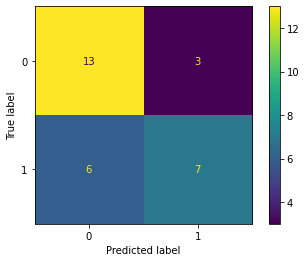

In [201]:
plot_confusion_matrix(XG_lem, tfidf_data_test_lem, y_test_lem);

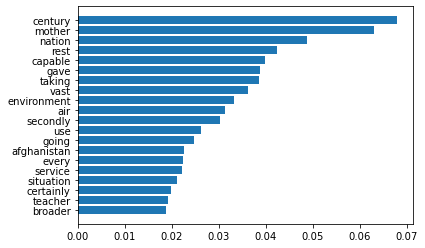

In [202]:
importances = sorted(list(zip(XG_lem.feature_importances_, tfidf.get_feature_names())))[-20:]
impts = pd.DataFrame(importances, columns=['impt', 'feat'])
plt.barh(impts.feat, impts.impt);

# Hyperparameter Tuning Using GridSearch

In [213]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [5],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [214]:
best_model = XGBClassifier()

In [215]:
grid_clf = GridSearchCV(XG_lem, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(tfidf_data_train_lem, y_train_lem)

best_parameters = grid_clf.best_params_

In [216]:
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(tfidf_data_train_lem)
test_preds = grid_clf.predict(tfidf_data_test_lem)
training_accuracy = accuracy_score(y_train_lem, training_preds)
test_accuracy = accuracy_score(y_test_lem, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 5
min_child_weight: 2
n_estimators: 100
subsample: 0.5

Training Accuracy: 100.0%
Validation accuracy: 68.97%


In [236]:
param_grid2 = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [20],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [237]:
grid_clf2 = GridSearchCV(XG_lem, param_grid2, scoring='accuracy', cv=10, n_jobs=1)
grid_clf2.fit(tfidf_data_train_lem, y_train_lem)

best_parameters = grid_clf2.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf2.predict(tfidf_data_train_lem)
test_preds = grid_clf2.predict(tfidf_data_test_lem)
training_accuracy = accuracy_score(y_train_lem, training_preds)
test_accuracy = accuracy_score(y_test_lem, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 20
min_child_weight: 2
n_estimators: 100
subsample: 0.5

Training Accuracy: 100.0%
Validation accuracy: 72.41%


In [ ]:
XGFinal_model = XGBClassifier(learning_rate = 0.1,
max_depth = 6,
min_child_weight = 1,
n_estimators = 100,
subsample = 0.7)

run_model(XGFinal_model, X, y)

## Relevant Terms

In [245]:
X_train_lem2, X_test_lem2, y_train_lem2, y_test_lem2 = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

tfidf2 = TfidfVectorizer(min_df=0.1, stop_words=sw_set)

tfidf_data_train_lem2 = tfidf2.fit_transform(X_train_lem2)
tfidf_data_test_lem2 = tfidf2.transform(X_test_lem2)

tfidf_data_train_lem2

<114x2145 sparse matrix of type '<class 'numpy.float64'>'
	with 69162 stored elements in Compressed Sparse Row format>

In [246]:
non_zero_cols2 = tfidf_data_train_lem2.nnz / float(tfidf_data_train_lem2.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse2 = 1 - (non_zero_cols / float(tfidf_data_train_lem2.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 878.2105263157895
Percentage of columns containing ZERO: 0.9348991455659162


In [247]:
XG_lem2 = XGBClassifier()

In [248]:
XG_lem2.fit(tfidf_data_train_lem2, y_train_lem2)

xg_train_preds_lem2 = XG_lem2.predict(tfidf_data_train_lem2)
xg_test_preds_lem2 = XG_lem2.predict(tfidf_data_test_lem2)

In [249]:
print(classification_report(y_train_lem2, xg_train_preds_lem2))
print(classification_report(y_test_lem2, xg_test_preds_lem2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

              precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       0.60      0.46      0.52        13

    accuracy                           0.62        29
   macro avg       0.62      0.61      0.60        29
weighted avg       0.62      0.62      0.61        29



When I tried to increase the amount of relevant terms in the vectorized word set, my prediction level decreased by 7%. The dimensionality of my data was sufficient enough for prediction and any word tokens that are added to the documents increased our prediction capabilities. Most of the words in the data are important, and the decrease in the accuracy rate proves it. This shows the previous model not testing for relevant terms 

In [ ]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_set)

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])


percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))


rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)

rf_train_preds_lem = rf_classifier_lem.predict(tfidf_data_train_lem)
rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)

print(classification_report(y_train_lem, rf_train_preds_lem))
print(classification_report(y_test_lem, rf_test_preds_lem))